In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import missingno
import texthero
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import model_selection,metrics
from sklearn.metrics import plot_confusion_matrix,roc_auc_score,roc_curve,confusion_matrix
from sklearn.metrics import log_loss
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE
from nltk.corpus import opinion_lexicon
import re
from tqdm import tqdm
from textblob import TextBlob
from langdetect import detect, DetectorFactory
import fasttext
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
#pip install missingno
#pip install --upgrade pip
#!pip install texthero
#pip install imblearn (do it at Anaconda prompt)
#pip install xgboost
#pip install catboost
#pip install TextBlob
#pip install langdetect
#pip install langid
#pip install fasttext

In [3]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv') 

In [4]:
train.shape

(17996, 17)

In [5]:
train.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [6]:
train.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [7]:
train.describe()

Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

In [8]:
train.describe(include=['O'])

Artist Name Track Name
count             17996      17996
unique             9149      15129
top     Backstreet Boys     Dreams
freq                 69          9

In [9]:
train.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [10]:
categorical = []
continuous = []
discrete = []

for col in train.columns:
    if train.dtypes[col] == 'O':
        categorical.append(col)
        
    elif train.dtypes[col] == 'float64':
        continuous.append(col)
        
    elif train.dtypes[col] == 'int64':
        discrete.append(col)

print('Categorical data:',categorical,'\n')
print('Continuous data:',continuous,'\n')
print('Discrete data:',discrete,'\n')

Categorical data: ['Artist Name', 'Track Name'] 

Continuous data: ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms'] 

Discrete data: ['mode', 'time_signature', 'Class'] 



# Visualize data distribution

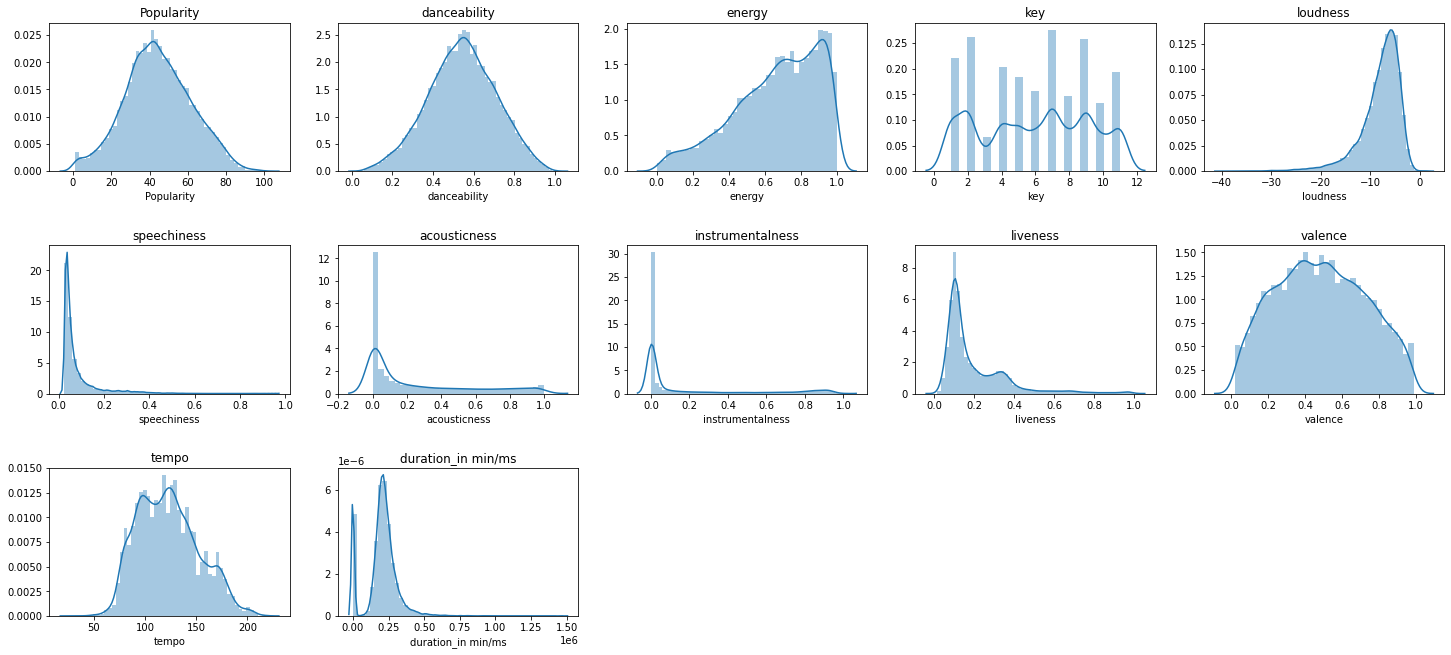

In [11]:
def plot(data,continuous,type,hue=None):
    
    if type == 'dist':
        width=25
        height=15
        cols = 5
    elif type == 'count':
        width=20
        height=25
        cols = 5
    else:
        width=20
        height=35
        cols = 2     
        
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    
    rows = math.ceil(float(data.shape[1]) / cols)

    for i, column in enumerate(continuous):
        col_type = data.dtypes[column]
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        
        if type == 'dist':
            g = sns.distplot(data[column])
            
        elif type == 'count':
            g = sns.countplot(y=column, hue=hue, data=data)
            
        elif type == 'violin':
            g = sns.violinplot(x="Class", y=column, data=data)
            
        elif type == 'box':
            g = sns.boxplot(x="Class", y=column, data=data)
        
plot(train,continuous,'dist')

energy, loudness, speechiness, acousticness, intrumentalness, liveness, duration_in min/ms are variables which considered skewed.

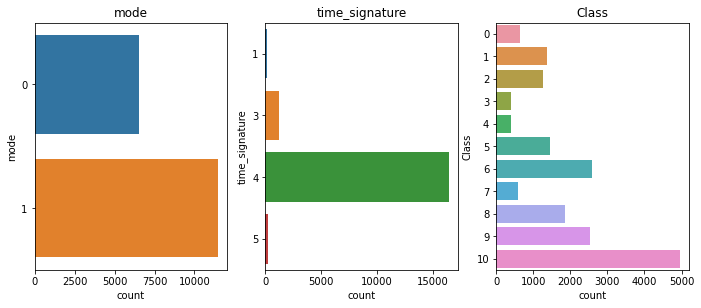

In [12]:
plot(train,discrete,'count')

There is an obvious imbalanced class distribution (Class plot).

In [13]:
#Find unique value for each categorical data
#Already shown at train.describe(include=['O'])\
print('Number of unique values (categorical data):')
for col in categorical:
    print(col+':',len(train[col].unique()))

Number of unique values (categorical data):
Artist Name: 9149
Track Name: 15129


Cannot plot count value for Categorical data because there are too many unique values.

# Visualize distribution of NaN (missing) values

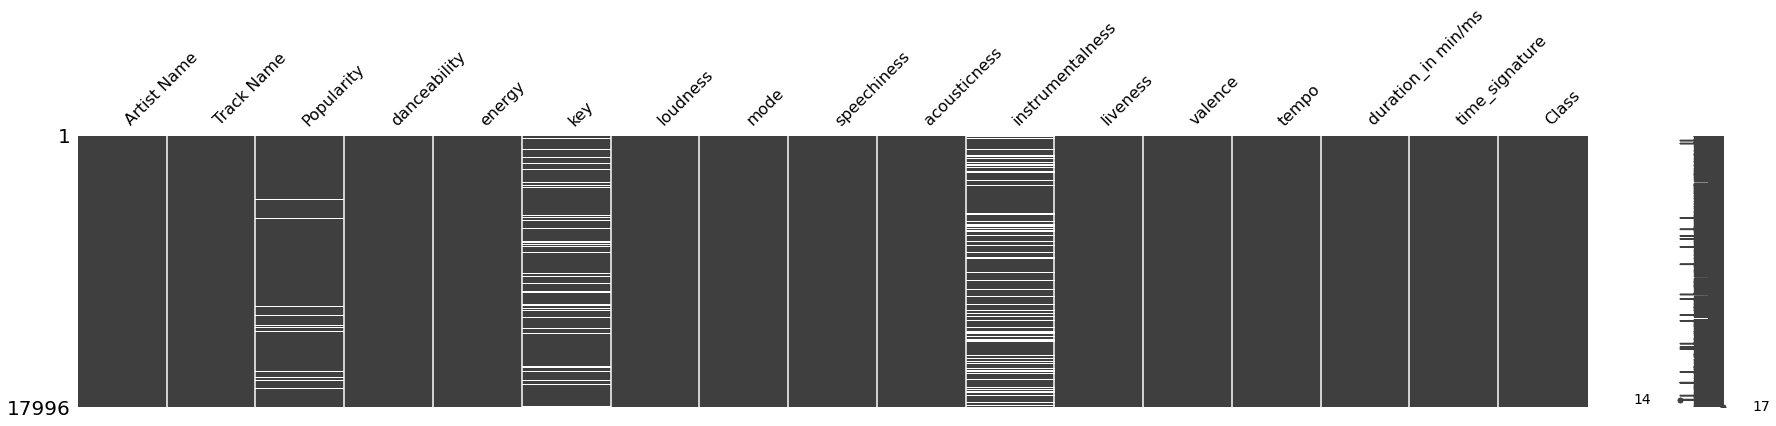

In [14]:
#Train data
missingno.matrix(train, figsize = (30,5))

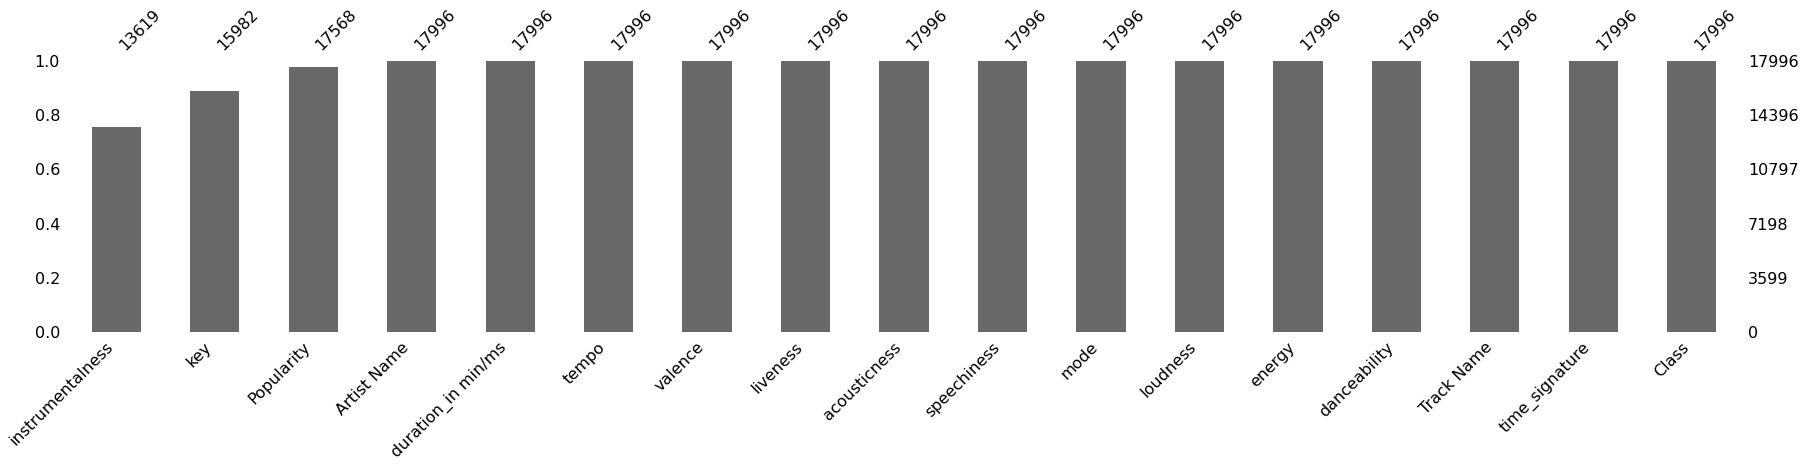

In [15]:
#Train data
missingno.bar(train, sort='ascending', figsize = (30,5))

Columns 'instrumentalness','key','Popularity' have NaN values. The worst at 'instrumentalness'.

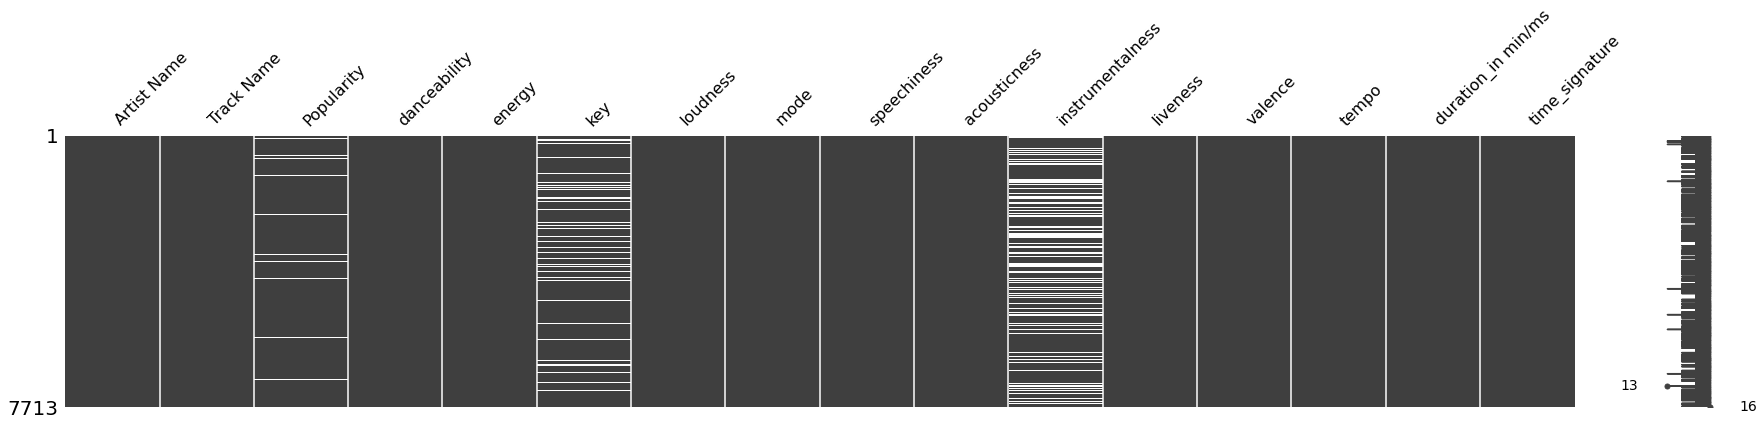

In [16]:
#Test data
missingno.matrix(test, figsize = (30,5))

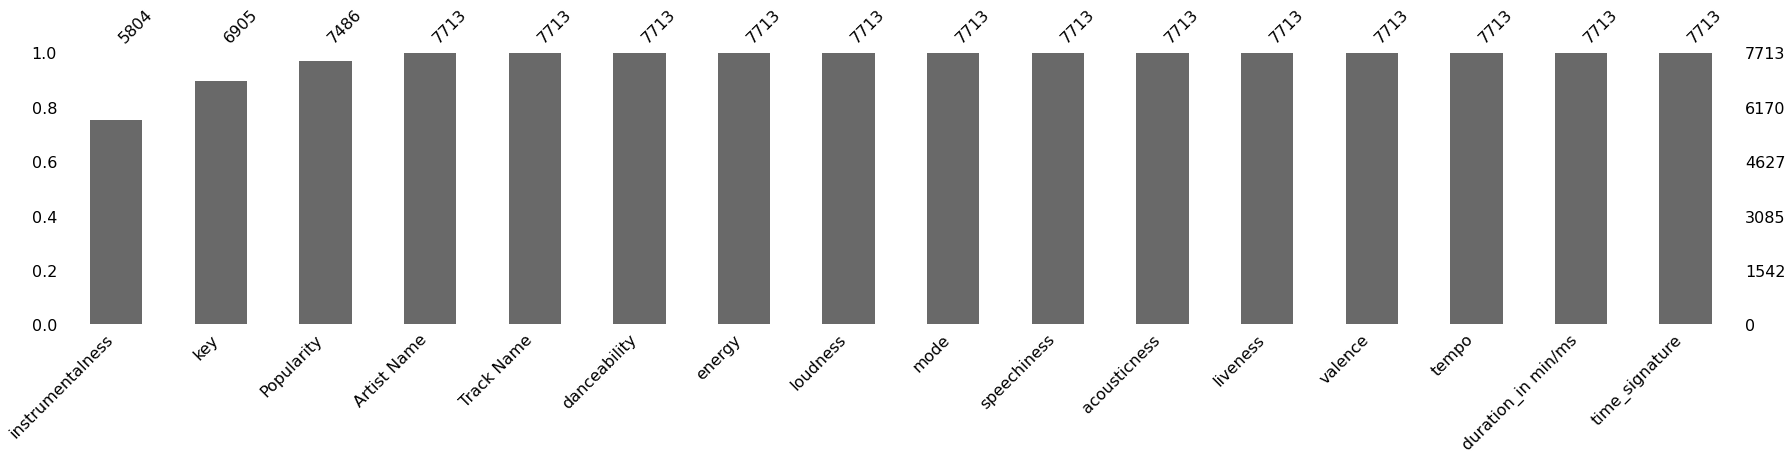

In [17]:
#Test data
missingno.bar(test, sort='ascending', figsize = (30,5))

# Feature Cleaning

In [18]:
def scale(dataframe):
    df = dataframe
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
    return df

In [19]:
#Train data
train_continuous_df = train[continuous].copy()
train_continuous_df = scale(train_continuous_df)

#Test data
test_continuous_df = test[continuous].copy()
test_continuous_df = scale(test_continuous_df)

In [20]:
for col in continuous:
    train[col] = train_continuous_df[col]
    test[col] = test_continuous_df[col]

In [21]:
train_copy = train.select_dtypes(exclude=object)
test_copy = test.select_dtypes(exclude=object)

In [22]:
knn_imputer1  = KNNImputer(n_neighbors=5)
knn_imputer2  = KNNImputer(n_neighbors=5)

In [23]:
train_copy_imputed = pd.DataFrame(knn_imputer1.fit_transform(train_copy), columns = train_copy.columns)
test_copy_imputed = pd.DataFrame(knn_imputer2.fit_transform(test_copy), columns = test_copy.columns)

In [24]:
train_copy.head()

Popularity  danceability    energy  key  loudness  mode  speechiness  \
0    0.595960      0.854745  0.563991  0.0  0.847024     1     0.027882   
1    0.535354      0.346890  0.813996  0.2  0.792166     1     0.019410   
2    0.343434      0.402841  0.613992  0.5  0.765439     1     0.032172   
3    0.656566      0.853669  0.596992  0.9  0.809161     0     0.035389   
4    0.525253      0.115558  0.974999  0.1  0.863607     1     0.207507   

   acousticness  instrumentalness  liveness   valence     tempo  \
0      0.017169               NaN  0.073879  0.910096  0.553969   
1      0.001104          0.004025  0.090173  0.569081  0.459689   
2      0.487952          0.000196  0.386702  0.794358  0.626804   
3      0.021285               NaN  0.111426  0.569081  0.409271   
4      0.000170          0.016164  0.162028  0.075953  0.901766   

   duration_in min/ms  time_signature  Class  
0            0.158812               4      5  
1            0.170413               4     10  
2            0.074240               4      6  
3            0.117769               4      5  
4            0.155674               4     10

In [25]:
train_copy_imputed.head()

Popularity  danceability    energy  key  loudness  mode  speechiness  \
0    0.595960      0.854745  0.563991  0.0  0.847024   1.0     0.027882   
1    0.535354      0.346890  0.813996  0.2  0.792166   1.0     0.019410   
2    0.343434      0.402841  0.613992  0.5  0.765439   1.0     0.032172   
3    0.656566      0.853669  0.596992  0.9  0.809161   0.0     0.035389   
4    0.525253      0.115558  0.974999  0.1  0.863607   1.0     0.207507   

   acousticness  instrumentalness  liveness   valence     tempo  \
0      0.017169          0.007524  0.073879  0.910096  0.553969   
1      0.001104          0.004025  0.090173  0.569081  0.459689   
2      0.487952          0.000196  0.386702  0.794358  0.626804   
3      0.021285          0.004077  0.111426  0.569081  0.409271   
4      0.000170          0.016164  0.162028  0.075953  0.901766   

   duration_in min/ms  time_signature  Class  
0            0.158812             4.0    5.0  
1            0.170413             4.0   10.0  
2            0.074240             4.0    6.0  
3            0.117769             4.0    5.0  
4            0.155674             4.0   10.0

In [26]:
test_copy.head()

Popularity  danceability    energy  key  loudness  mode  speechiness  \
0    0.727273      0.317949  0.402988  NaN  0.611405     1     0.033958   
1    0.333333      0.524103  0.954999  0.0  0.841350     1     0.134375   
2    0.777778      0.717949  0.708994  0.6  0.842766     1     0.087396   
3    0.797980      0.341538  0.636993  0.0  0.845492     0     0.060521   
4    0.474747      0.403077  0.848997  1.0  0.866603     1     0.047813   

   acousticness  instrumentalness  liveness   valence     tempo  \
0      0.072965          0.000093  0.125218  0.474542  0.539132   
1      0.000402          0.000008  0.252384  0.296334  0.609117   
2      0.004824               NaN  0.012306  0.636456  0.489176   
3      0.131658          0.000017  0.135473  0.134420  0.560853   
4      0.004231               NaN  0.148805  0.226069  0.296779   

   duration_in min/ms  time_signature  
0            0.203715               4  
1            0.141187               4  
2            0.130008               4  
3            0.110620               4  
4            0.000002               4

In [27]:
train_copy_imputed.head()

Popularity  danceability    energy  key  loudness  mode  speechiness  \
0    0.595960      0.854745  0.563991  0.0  0.847024   1.0     0.027882   
1    0.535354      0.346890  0.813996  0.2  0.792166   1.0     0.019410   
2    0.343434      0.402841  0.613992  0.5  0.765439   1.0     0.032172   
3    0.656566      0.853669  0.596992  0.9  0.809161   0.0     0.035389   
4    0.525253      0.115558  0.974999  0.1  0.863607   1.0     0.207507   

   acousticness  instrumentalness  liveness   valence     tempo  \
0      0.017169          0.007524  0.073879  0.910096  0.553969   
1      0.001104          0.004025  0.090173  0.569081  0.459689   
2      0.487952          0.000196  0.386702  0.794358  0.626804   
3      0.021285          0.004077  0.111426  0.569081  0.409271   
4      0.000170          0.016164  0.162028  0.075953  0.901766   

   duration_in min/ms  time_signature  Class  
0            0.158812             4.0    5.0  
1            0.170413             4.0   10.0  
2            0.074240             4.0    6.0  
3            0.117769             4.0    5.0  
4            0.155674             4.0   10.0

In [28]:
for col in test_copy_imputed.columns:
    train[col] = train_copy_imputed[col]
    test[col] = test_copy_imputed[col]

Check if all the NaN are imputed. No NaN remains.

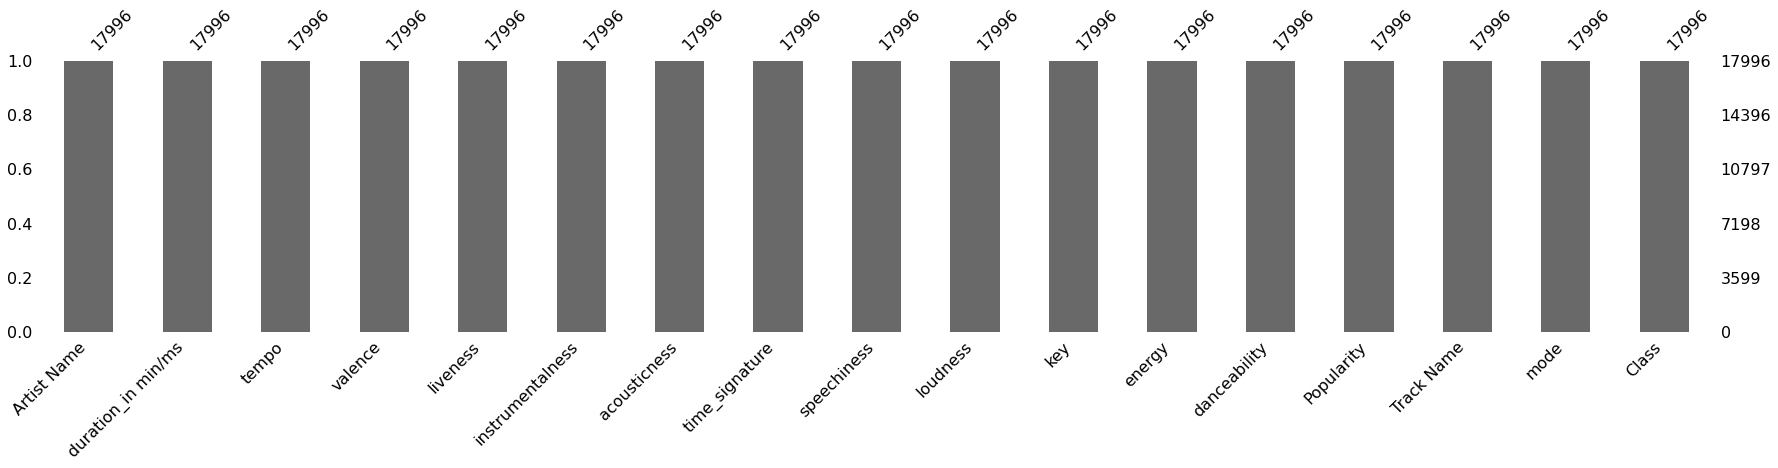

In [29]:
#Train data
missingno.bar(train, sort='ascending', figsize = (30,5))

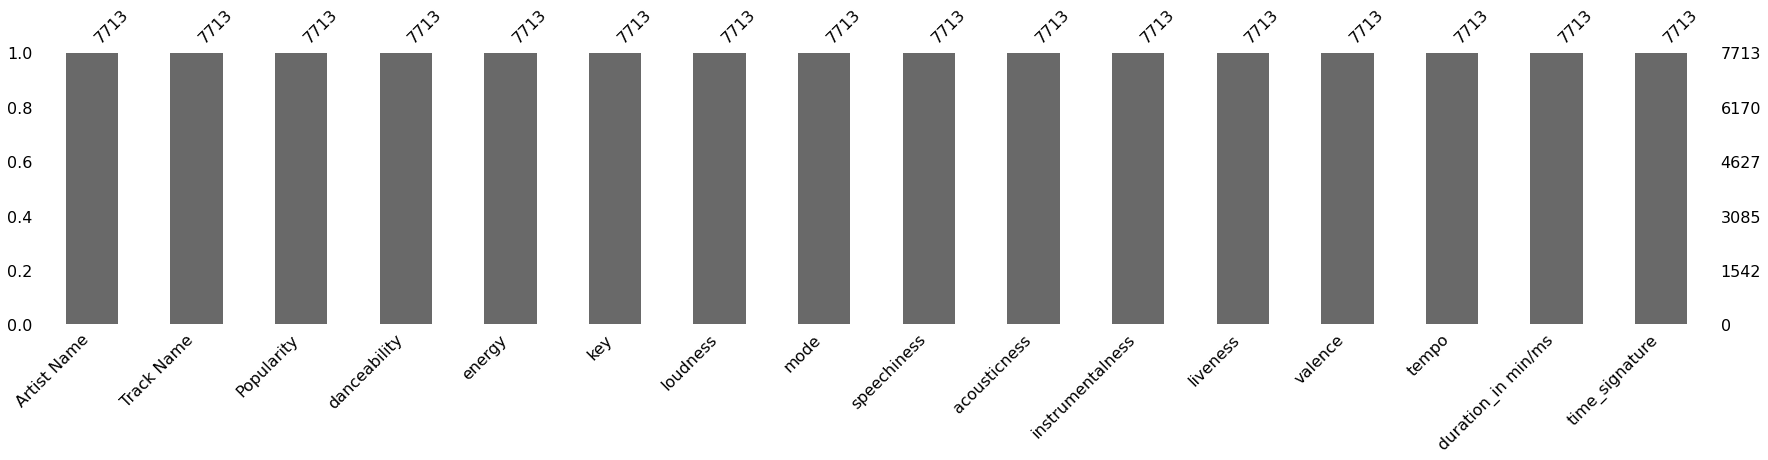

In [30]:
#Test data
missingno.bar(test, sort='ascending', figsize = (30,5))

In [31]:
#import sweetviz
#report=sweetviz.analyze(train_copy_imputed)
#report.show_html()

# Feature Engineering

In [32]:
def find_song(x):
    length = len(x)
    idx = x.find("feat")
    
    if idx != -1:
        return x[0:idx-2]
    else:
        return x

train_song = train['Track Name'].apply(find_song)
test_song = test['Track Name'].apply(find_song)

In [33]:
train['songs'] = train_song
test['songs'] = test_song

In [34]:
def filter_feat(x):
    length = len(x)
    idx = x.find("feat")
    
    if idx != -1:
        new_idx = idx+6
        return x[new_idx:-1]
    else:
        return 'None'

train_feat_artist = train['Track Name'].apply(filter_feat)
test_feat_artist = test['Track Name'].apply(filter_feat)

In [35]:
train_feat_artist.value_counts()

None                      17341
Lil Durk                      9
DaBaby                        8
Drake                         6
Marcus King                   6
                          ...  
Anjna Swaminathan             1
Kim Petras and Jay Par        1
T-Shyne                       1
Da Brat                       1
                              1
Name: Track Name, Length: 523, dtype: int64

Since most songs do not have featured artists, a column can be created to indicate whether there is feature artist present, rather than using the featured artists' names

In [36]:
train['feat_artists'] = train_feat_artist
test['feat_artists'] = test_feat_artist

In [37]:
def find_feat(x):
    if x == 'None':
        return 0
    else:
        return 1

train['feat'] = train['feat_artists'].apply(find_feat).astype(int)
test['feat'] = test['feat_artists'].apply(find_feat).astype(int)

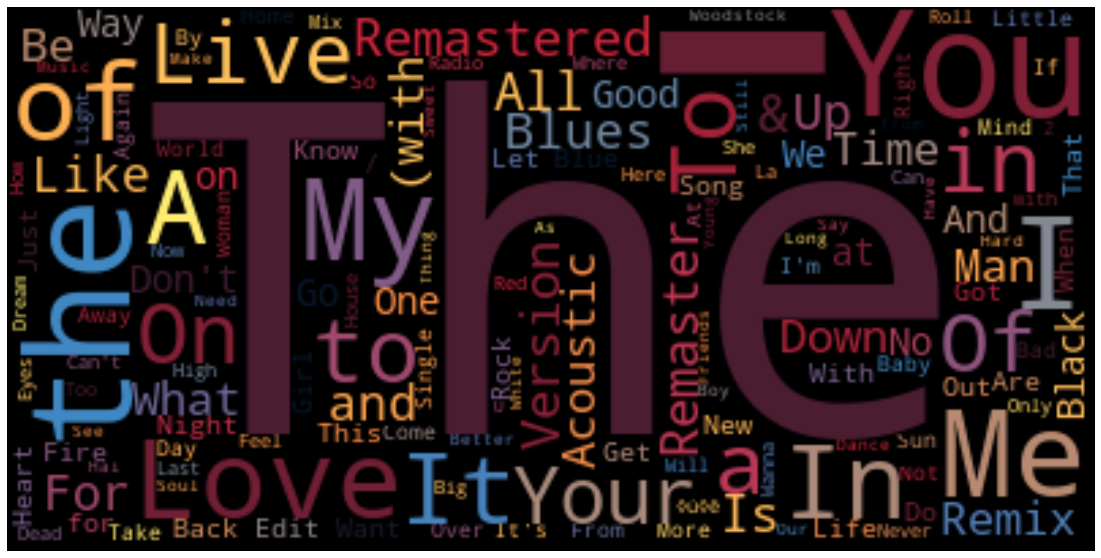

In [38]:
texthero.wordcloud(train['songs'], background_color='black')

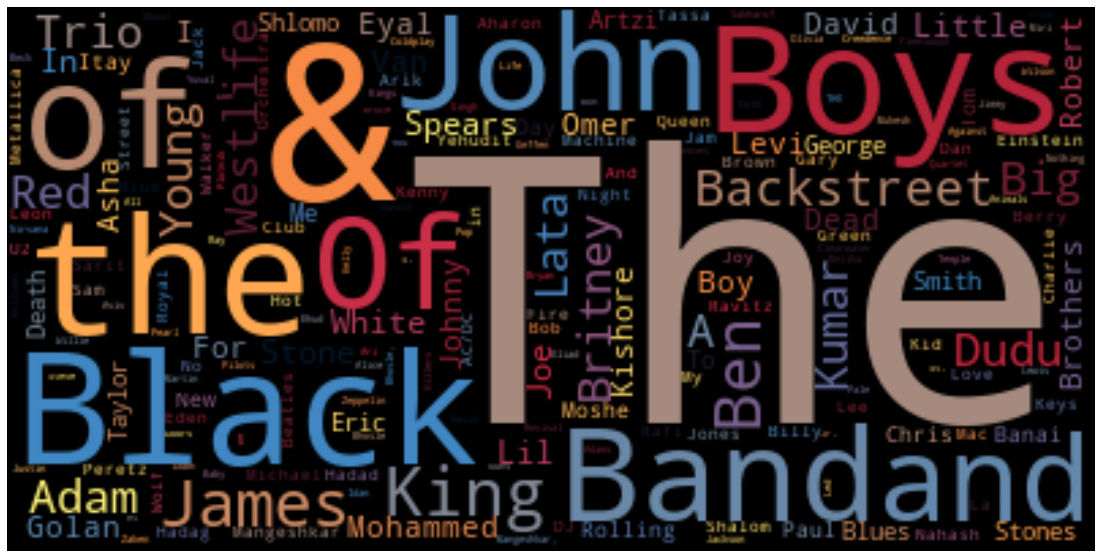

In [39]:
texthero.wordcloud(train['Artist Name'], background_color='black')

In [40]:
train.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)    0.595960   
1                 Boston                           Hitch a Ride    0.535354   
2          The Raincoats                     No Side to Fall In    0.343434   
3                   Deno             Lingo (feat. J.I & Chunkz)    0.656566   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered    0.525253   

   danceability    energy  key  loudness  mode  speechiness  acousticness  \
0      0.854745  0.563991  0.0  0.847024   1.0     0.027882      0.017169   
1      0.346890  0.813996  0.2  0.792166   1.0     0.019410      0.001104   
2      0.402841  0.613992  0.5  0.765439   1.0     0.032172      0.487952   
3      0.853669  0.596992  0.9  0.809161   0.0     0.035389      0.021285   
4      0.115558  0.974999  0.1  0.863607   1.0     0.207507      0.000170   

   instrumentalness  liveness   valence     tempo  duration_in min/ms  \
0          0.007524  0.073879  0.910096  0.553969            0.158812   
1          0.004025  0.090173  0.569081  0.459689            0.170413   
2          0.000196  0.386702  0.794358  0.626804            0.074240   
3          0.004077  0.111426  0.569081  0.409271            0.117769   
4          0.016164  0.162028  0.075953  0.901766            0.155674   

   time_signature  Class                              songs  feat_artists  \
0             4.0      5                 That's What I Like    Gucci Mane   
1             4.0     10                       Hitch a Ride          None   
2             4.0      6                 No Side to Fall In          None   
3             4.0      5                              Lingo  J.I & Chunkz   
4             4.0     10  Nobody Weird Like Me - Remastered          None   

   feat  
0     1  
1     0  
2     0  
3     1  
4     0

In [41]:
def find_words(x):
    positive = 0
    negative = 0
    for w in x:
        if w in opinion_lexicon.negative():
            negative += 1
        elif w in opinion_lexicon.positive():
            positive += 1
    return [positive,negative]

def convert(x):
    a = x
    b = re.sub(r'[^\w]', ' ', a)
    c = b.lower()
    splitted_words = c.split()
    
    return splitted_words

In [42]:
##Train data
#train['convert'] = train['songs'].apply(convert)

##Test data
#test['convert'] = test['songs'].apply(convert)

#polarity = []
#for i in tqdm(train['convert']):
#    polarity.append(find_words(i))
    
#train_positive = []
#train_negative = []

#for k in polarity:
#    train_positive.append(k[0])
#    train_negative.append(k[1])
    
##Train data
#train['positive'] = train_positive
#train['negative'] = train_negative

#polarity = []
#for i in tqdm(test['convert']):
#    polarity.append(find_words(i))
    
#test_positive = []
#test_negative = []

#for k in polarity:
#    test_positive.append(k[0])
#    test_negative.append(k[1])
    
##Test data
#test['positive'] = test_positive
#test['negative'] = test_negative

#PRETRAINED_MODEL_PATH = 'lid.176.bin'
#model = fasttext.load_model(PRETRAINED_MODEL_PATH)

#lang_train = []
#for i in tqdm(train['songs']):
#    lang_train.append(model.predict(i)[0][0][9:])
    
#lang_test = []
#for i in tqdm(test['songs']):
#    lang_test.append(model.predict(i)[0][0][9:])
    
##Train data
#train['language'] = lang_train

##Test data
#test['language'] = lang_test

In [43]:
train.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)    0.595960   
1                 Boston                           Hitch a Ride    0.535354   
2          The Raincoats                     No Side to Fall In    0.343434   
3                   Deno             Lingo (feat. J.I & Chunkz)    0.656566   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered    0.525253   

   danceability    energy  key  loudness  mode  speechiness  acousticness  \
0      0.854745  0.563991  0.0  0.847024   1.0     0.027882      0.017169   
1      0.346890  0.813996  0.2  0.792166   1.0     0.019410      0.001104   
2      0.402841  0.613992  0.5  0.765439   1.0     0.032172      0.487952   
3      0.853669  0.596992  0.9  0.809161   0.0     0.035389      0.021285   
4      0.115558  0.974999  0.1  0.863607   1.0     0.207507      0.000170   

   instrumentalness  liveness   valence     tempo  duration_in min/ms  \
0          0.007524  0.073879  0.910096  0.553969            0.158812   
1          0.004025  0.090173  0.569081  0.459689            0.170413   
2          0.000196  0.386702  0.794358  0.626804            0.074240   
3          0.004077  0.111426  0.569081  0.409271            0.117769   
4          0.016164  0.162028  0.075953  0.901766            0.155674   

   time_signature  Class                              songs  feat_artists  \
0             4.0      5                 That's What I Like    Gucci Mane   
1             4.0     10                       Hitch a Ride          None   
2             4.0      6                 No Side to Fall In          None   
3             4.0      5                              Lingo  J.I & Chunkz   
4             4.0     10  Nobody Weird Like Me - Remastered          None   

   feat  
0     1  
1     0  
2     0  
3     1  
4     0

In [44]:
test.head()

Artist Name                                Track Name  Popularity  \
0      David Bowie              Space Oddity - 2015 Remaster    0.727273   
1      Crimson Sun                       Essence of Creation    0.333333   
2             P!nk                          Raise Your Glass    0.777778   
3     Shawn Mendes                                    Wonder    0.797980   
4  Backstreet Boys  Helpless When She Smiles - Radio Version    0.474747   

   danceability    energy   key  loudness  mode  speechiness  acousticness  \
0      0.317949  0.402988  0.22  0.611405   1.0     0.033958      0.072965   
1      0.524103  0.954999  0.00  0.841350   1.0     0.134375      0.000402   
2      0.717949  0.708994  0.60  0.842766   1.0     0.087396      0.004824   
3      0.341538  0.636993  0.00  0.845492   0.0     0.060521      0.131658   
4      0.403077  0.848997  1.00  0.866603   1.0     0.047813      0.004231   

   instrumentalness  liveness   valence     tempo  duration_in min/ms  \
0          0.000093  0.125218  0.474542  0.539132            0.203715   
1          0.000008  0.252384  0.296334  0.609117            0.141187   
2          0.028525  0.012306  0.636456  0.489176            0.130008   
3          0.000017  0.135473  0.134420  0.560853            0.110620   
4          0.001008  0.148805  0.226069  0.296779            0.000002   

   time_signature                                     songs feat_artists  feat  
0             4.0              Space Oddity - 2015 Remaster         None     0  
1             4.0                       Essence of Creation         None     0  
2             4.0                          Raise Your Glass         None     0  
3             4.0                                    Wonder         None     0  
4             4.0  Helpless When She Smiles - Radio Version         None     0

# Bi-variate Analysis

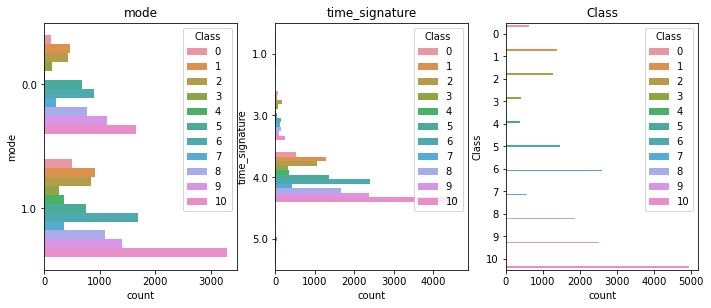

In [45]:
plot(train,discrete,'count','Class')

For mode, at each value {0.0,1.0}, class 10 has the highest count.

For time_signature, at each value {3.0,4.0,5.0}, class 10 has the highest count.

In [46]:
continuous.append('Class')

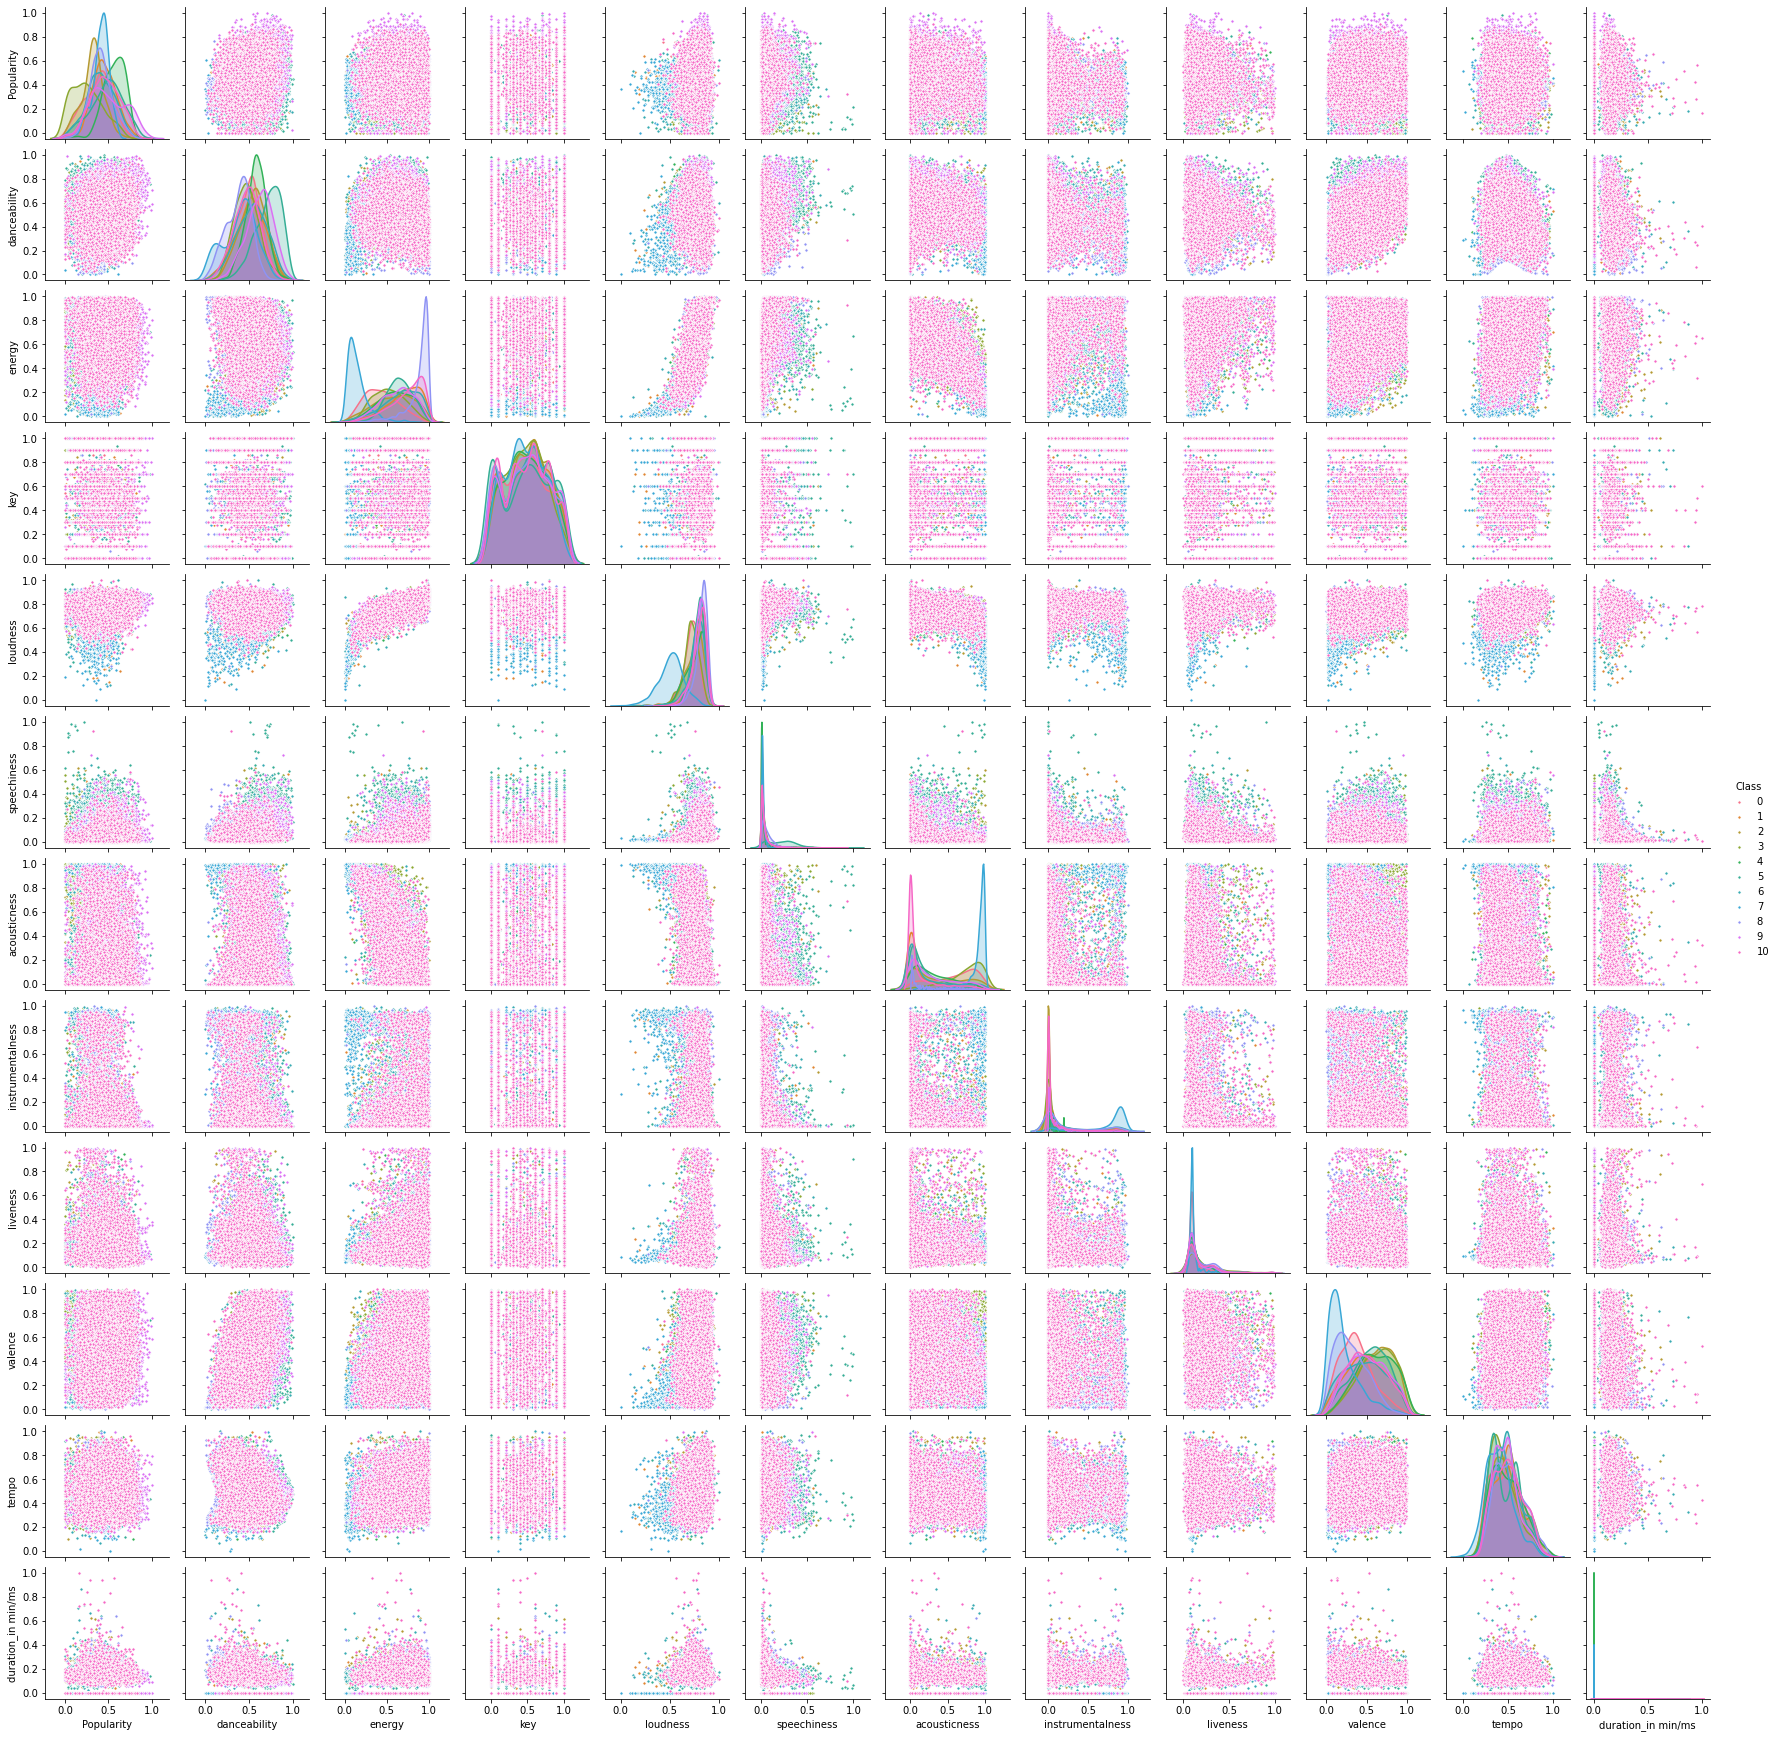

In [47]:
# Interaction between pairs of continuous features.
sns.pairplot(train[continuous], hue="Class", diag_kind="kde",plot_kws = {'alpha': 1, 's': 10},height=2)

The plots indicate that the classes are not linearly separable. From all the plots, only class 7 seems to be visually seperable from other classes. This means that most of the classes share similar characteristics.

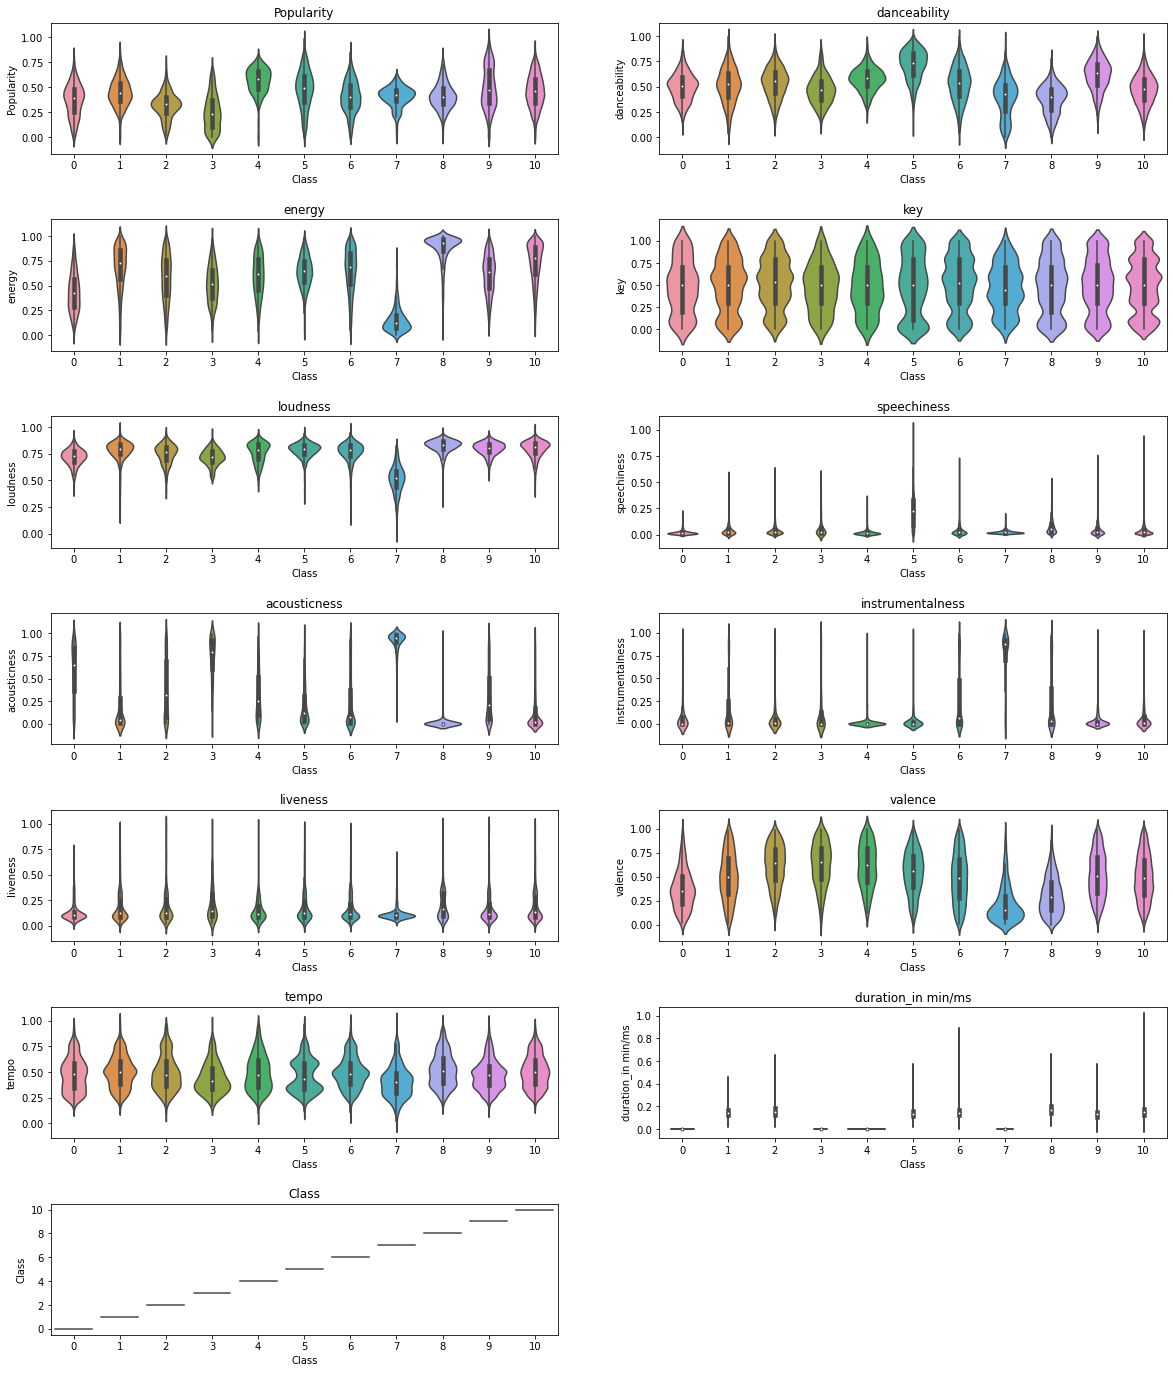

In [48]:
plot(train,continuous,'violin')

energy, loudness, speechiness, acousticness, instrumentalness, liveness, duration_in min/ms are the variables that indicate skewness.

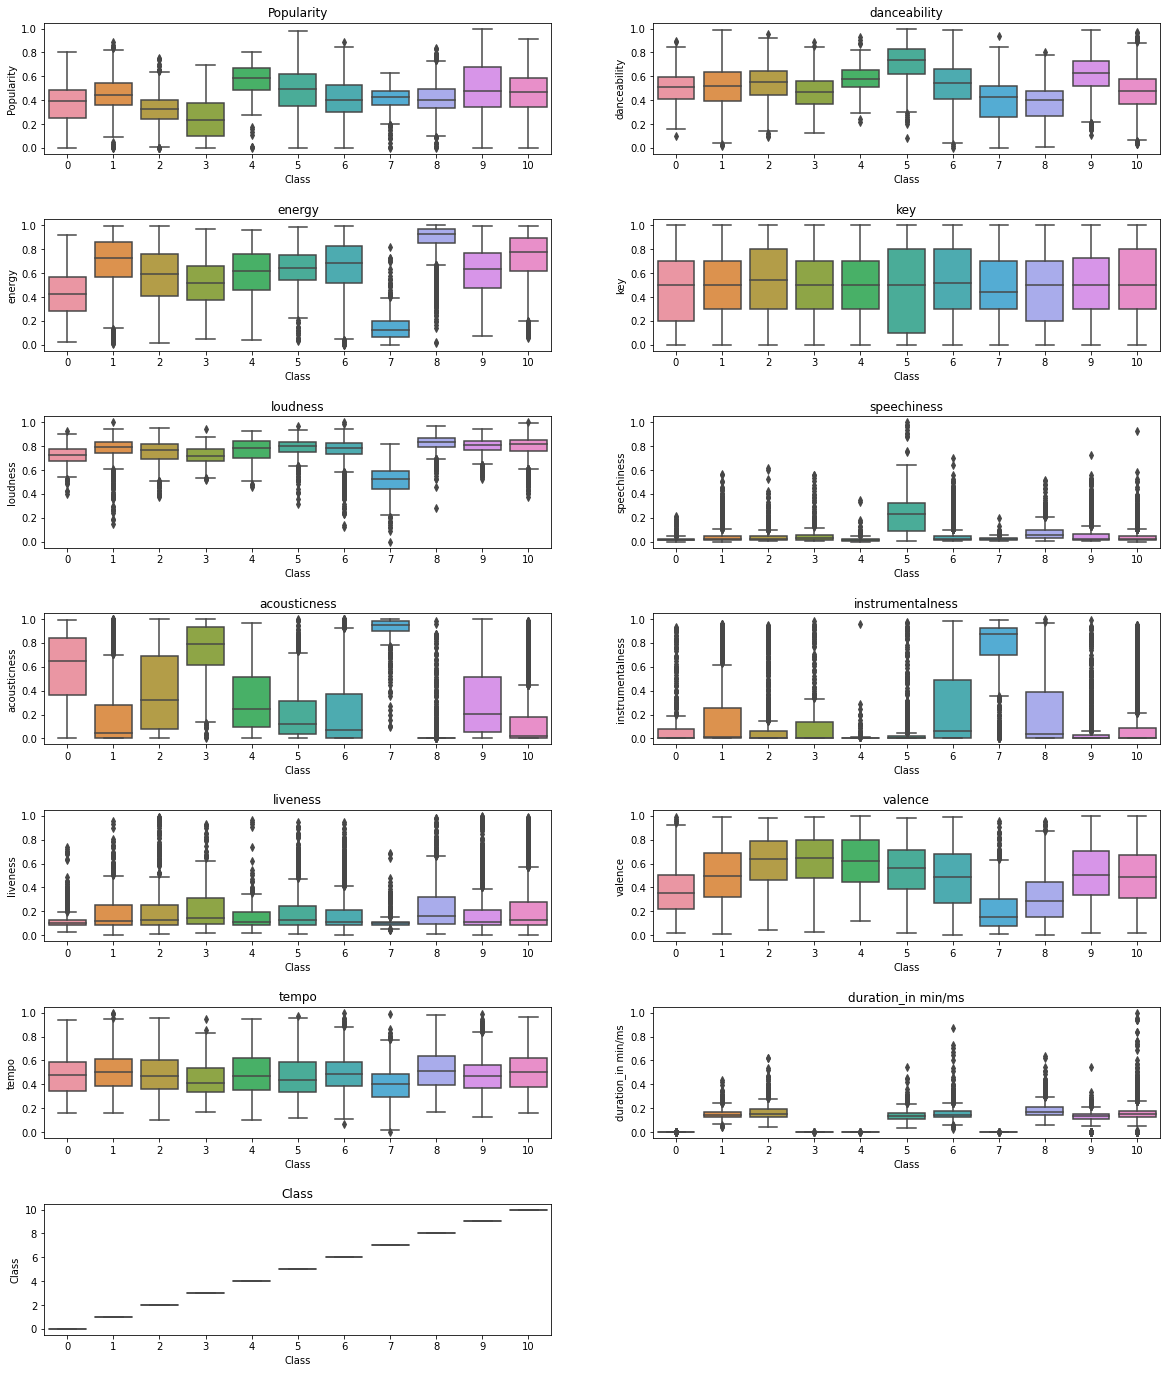

In [49]:
plot(train,continuous,'box')

loudness, speechiness, acousticness, instrumentalness, liveness, duration_in min/ms have a lot of outliers

After going through the analysis, the variables that are found skewed are:speechiness, acousticness, instrumentalness, liveness, duration_in min/ms.

# Fixing skewness

In [50]:
#PowerTransform
pt = PowerTransformer()

#QuantileTransform
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

In [51]:
#Skewed variables to be fixed
skewed = ['energy', 
          'loudness', 
          'speechiness', 
          'acousticness', 
          'instrumentalness', 
          'liveness', 
          'duration_in min/ms',
          'valence',
          'tempo']

In [52]:
train[skewed].head()

energy  loudness  speechiness  acousticness  instrumentalness  liveness  \
0  0.563991  0.847024     0.027882      0.017169          0.007524  0.073879   
1  0.813996  0.792166     0.019410      0.001104          0.004025  0.090173   
2  0.613992  0.765439     0.032172      0.487952          0.000196  0.386702   
3  0.596992  0.809161     0.035389      0.021285          0.004077  0.111426   
4  0.974999  0.863607     0.207507      0.000170          0.016164  0.162028   

   duration_in min/ms   valence     tempo  
0            0.158812  0.910096  0.553969  
1            0.170413  0.569081  0.459689  
2            0.074240  0.794358  0.626804  
3            0.117769  0.569081  0.409271  
4            0.155674  0.075953  0.901766

In [53]:
train_skewed_df = train[skewed]
train_pt_transformed = pd.DataFrame(pt.fit_transform(train_skewed_df), columns = train_skewed_df.columns)
train_qt_transformed = pd.DataFrame(qt.fit_transform(train_skewed_df), columns = train_skewed_df.columns)

test_skewed_df = test[skewed]
test_pt_transformed = pd.DataFrame(pt.fit_transform(test_skewed_df), columns = test_skewed_df.columns)
test_qt_transformed = pd.DataFrame(qt.fit_transform(test_skewed_df), columns = test_skewed_df.columns)

In [54]:
train_pt_transformed.head()

energy  loudness  speechiness  acousticness  instrumentalness  liveness  \
0 -0.569357  0.810263    -0.251337     -0.863634         -0.628023 -0.955652   
1  0.603923 -0.023723    -0.570988     -1.014555         -0.689739 -0.682977   
2 -0.362156 -0.358825    -0.105655      1.142775         -0.759263  1.480638   
3 -0.434077  0.212358    -0.002892     -0.826581         -0.688815 -0.368525   
4  1.554463  1.106574     1.853578     -1.023659         -0.482746  0.228324   

   duration_in min/ms   valence     tempo  
0            0.345200  1.654376  0.465611  
1            0.494989  0.375988 -0.126179  
2           -0.809694  1.232598  0.883195  
3           -0.200946  0.375988 -0.469625  
4            0.304340 -1.713100  2.213947

In [55]:
train_qt_transformed.head()

energy  loudness  speechiness  acousticness  instrumentalness  liveness  \
0 -0.488423  0.774035     0.030144     -0.390646          0.030201 -1.005258   
1  0.457524 -0.062195    -0.292978     -0.934417         -0.080431 -0.578204   
2 -0.324591 -0.376818     0.148734      0.754580         -0.653245  1.360472   
3 -0.380726  0.157224     0.225432     -0.343713         -0.077648 -0.093065   
4  1.824105  1.102447     1.445574     -1.331069          0.177273  0.324591   

   duration_in min/ms   valence     tempo  
0            0.421115  1.694447  0.438212  
1            0.661753  0.316658 -0.127373  
2           -1.039250  1.128319  0.824232  
3           -0.575789  0.316658 -0.402685  
4            0.349023 -1.760772  2.481840

In [56]:
#Train data
train_pt = train.copy()
train_qt = train.copy()

#Test data
test_pt = test.copy()
test_qt = test.copy()

In [57]:
for col in test_pt_transformed.columns:
    train_pt[col] = train_pt_transformed[col]
    train_qt[col] = train_qt_transformed[col]
    
    test_pt[col] = test_pt_transformed[col]
    test_qt[col] = test_qt_transformed[col]

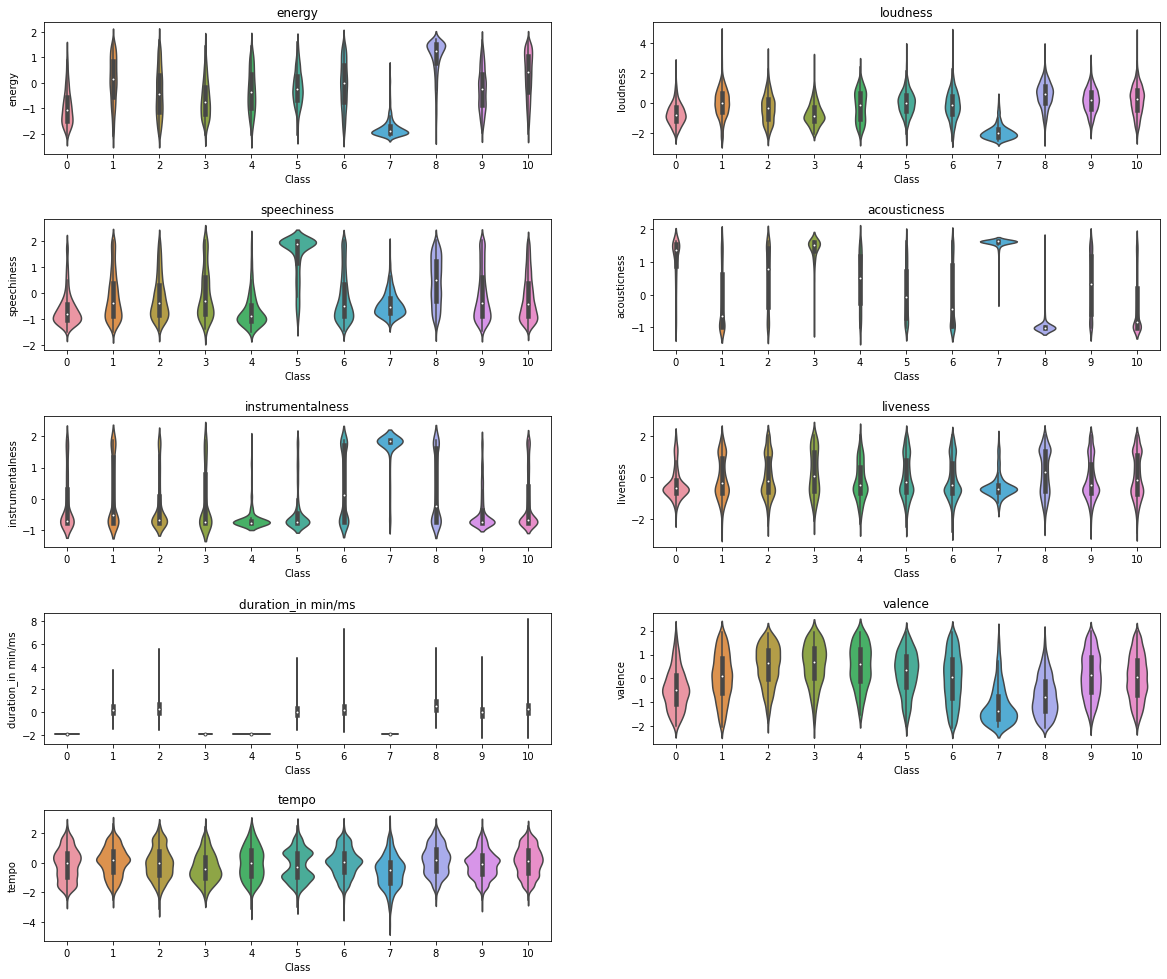

In [58]:
plot(train_pt,skewed,'violin')

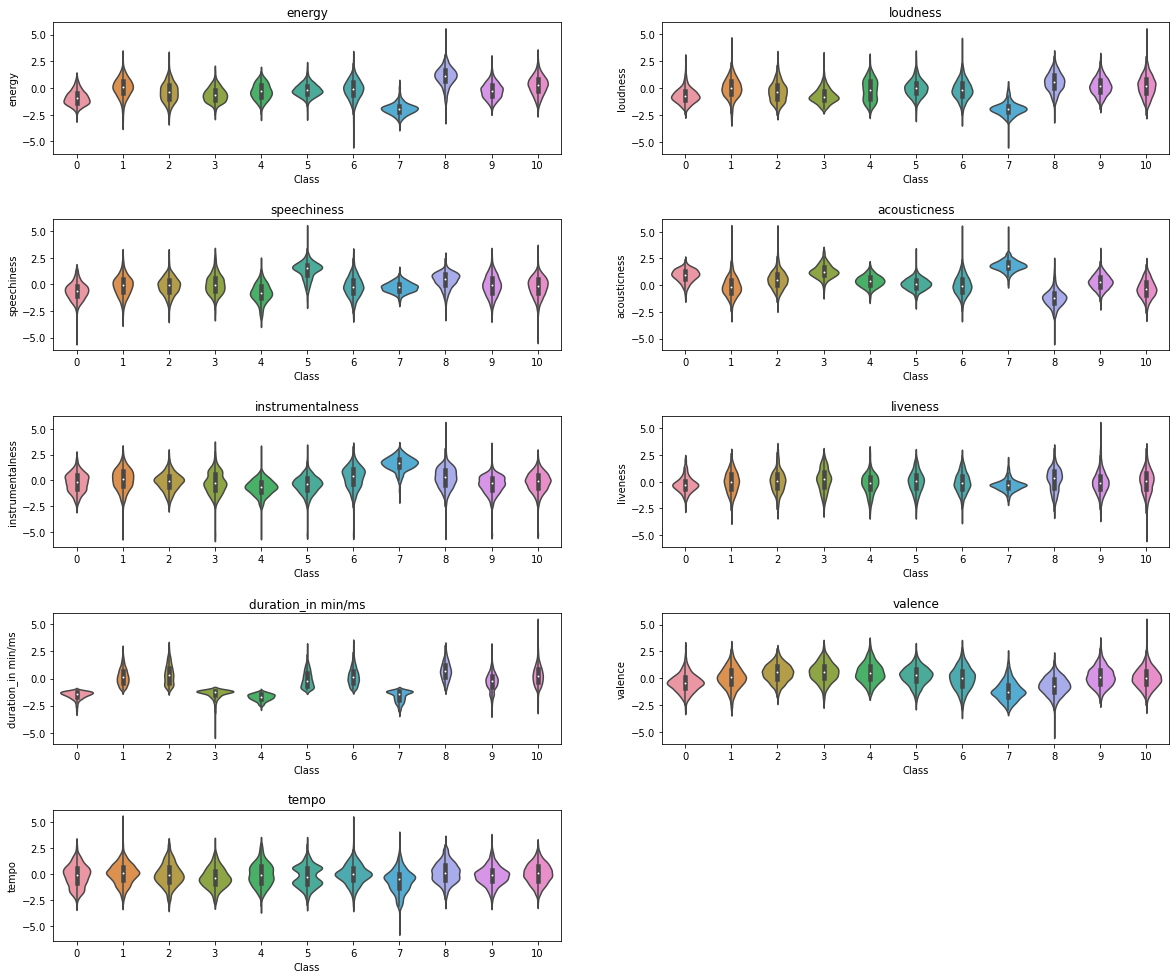

In [59]:
plot(train_qt,skewed,'violin')

It is shown that Quantile Transform improves the skewness of the variables, so the solution with Quantile Transformer is selected.

It can also be seen that with improved skewness, the number of outliers also decreases.

In [60]:
train = train_qt
test = test_qt

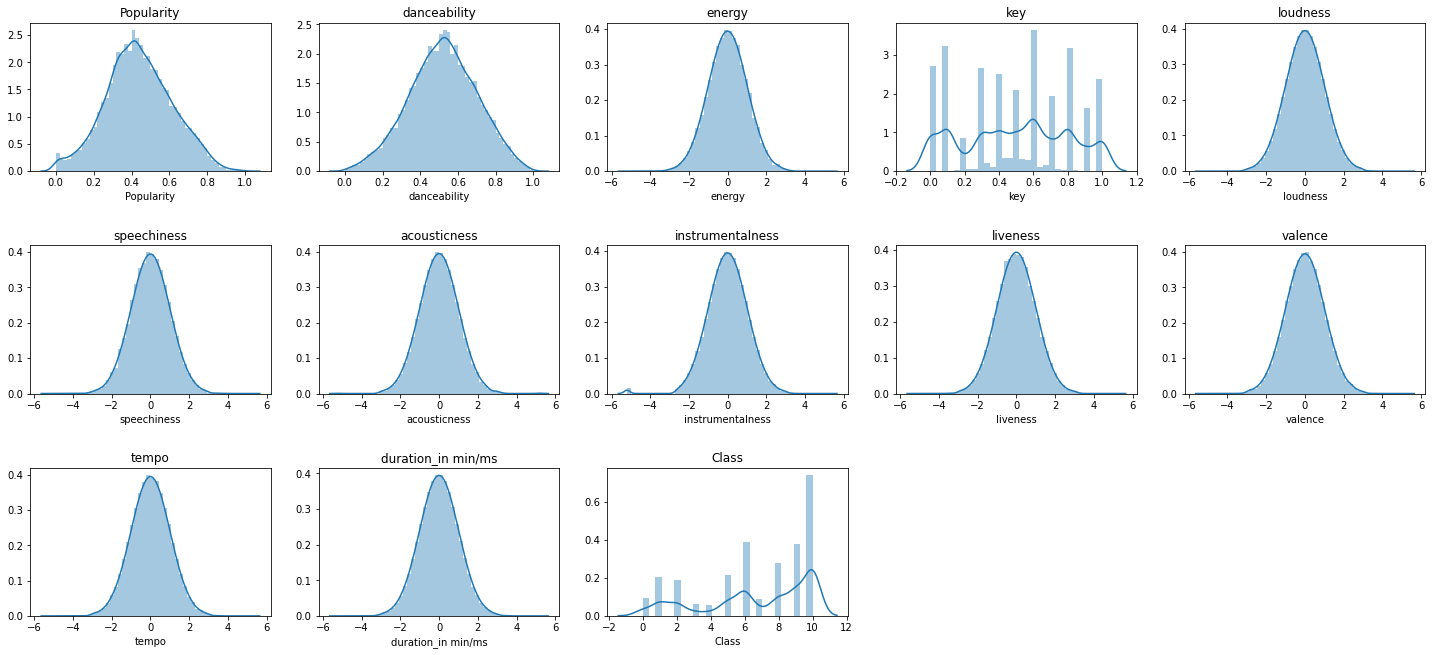

In [61]:
plot(train,continuous,'dist')

# Feature Encoding

Since all the data required are already in numerical form (except the track name and artist name), feature encoding is not needed. However, if feature encoding is required in future, one-hot encoding is preferred. 

Can use Pandas: get_dummies. Or Scikit-Learn: OrdinalEncoder, OneHotEncoder.

In [62]:
train.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                  float64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature        float64
Class                   int64
songs                  object
feat_artists           object
feat                    int32
dtype: object

In [63]:
#df1 = train['language']
#df2 = test['language']
#frames = [df1, df2]

#merged = pd.concat(frames)

#encoder = LabelEncoder()
#encoder.fit(merged)

#encode = ['language']

#train_encoded = train[encode].apply(encoder.transform)
#test_encoded = test[encode].apply(encoder.transform)

#train['lang_encoded'] = train_encoded
#test['lang_encoded'] = test_encoded

# Feature Selection

Object type variables are excluded.

In [64]:
train = train.select_dtypes(exclude=object)
test = test.select_dtypes(exclude=object)

In [65]:
train.head()

Popularity  danceability    energy  key  loudness  mode  speechiness  \
0    0.595960      0.854745 -0.488423  0.0  0.774035   1.0     0.030144   
1    0.535354      0.346890  0.457524  0.2 -0.062195   1.0    -0.292978   
2    0.343434      0.402841 -0.324591  0.5 -0.376818   1.0     0.148734   
3    0.656566      0.853669 -0.380726  0.9  0.157224   0.0     0.225432   
4    0.525253      0.115558  1.824105  0.1  1.102447   1.0     1.445574   

   acousticness  instrumentalness  liveness   valence     tempo  \
0     -0.390646          0.030201 -1.005258  1.694447  0.438212   
1     -0.934417         -0.080431 -0.578204  0.316658 -0.127373   
2      0.754580         -0.653245  1.360472  1.128319  0.824232   
3     -0.343713         -0.077648 -0.093065  0.316658 -0.402685   
4     -1.331069          0.177273  0.324591 -1.760772  2.481840   

   duration_in min/ms  time_signature  Class  feat  
0            0.421115             4.0      5     1  
1            0.661753             4.0     10     0  
2           -1.039250             4.0      6     0  
3           -0.575789             4.0      5     1  
4            0.349023             4.0     10     0

In [66]:
test.head()

Popularity  danceability    energy   key  loudness  mode  speechiness  \
0    0.727273      0.317949 -1.031815  0.22 -1.404155   1.0    -0.876494   
1    0.333333      0.524103  1.474747  0.00  0.726831   1.0     1.048107   
2    0.777778      0.717949  0.042711  0.60  0.750579   1.0     0.683387   
3    0.797980      0.341538 -0.230588  0.00  0.786420   0.0     0.289709   
4    0.474747      0.403077  0.611177  1.00  1.164342   1.0    -0.037684   

   acousticness  instrumentalness  liveness   valence     tempo  \
0     -0.014532         -0.868462  0.090543 -0.052769  0.440464   
1     -1.139984         -1.386161  0.688748 -0.730753  0.943195   
2     -0.667016          0.199933 -2.814556  0.496930  0.026434   
3      0.179283         -1.213034  0.166536 -1.489816  0.582191   
4     -0.688161         -0.436479  0.264255 -1.018128 -2.140649   

   duration_in min/ms  time_signature  feat  
0            1.363633             4.0     0  
1            0.204877             4.0     0  
2           -0.099380             4.0     0  
3           -0.587275             4.0     0  
4           -1.313623             4.0     0

In [67]:
#train = train[train.columns.difference(['positive', 'negative','lang_encoded'])]
#test = test[test.columns.difference(['positive', 'negative','lang_encoded'])]

#train = train[train.columns.difference(['positive', 'negative','lang_encoded'])]
#test = test[test.columns.difference(['positive', 'negative','lang_encoded'])]

In [68]:
def plot_corr(data):
    corr = data.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr, 
                vmin=-1, vmax=1, 
                square=True, 
                mask=mask,
                cmap=sns.color_palette("RdBu_r", 200), 
                linewidths=.5)

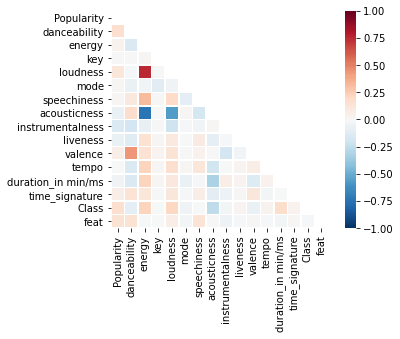

In [69]:
plot_corr(train)

In [70]:
def find_high_corr_pairs(df):
    corr = df.corr()
    corrlist = []
    for c in corr:
        corr_target = corr[c]
        relevant_features = dict(corr_target[np.absolute(corr_target)>0.6])
        del relevant_features[c]

        if len(relevant_features)>0:
            for k in relevant_features:
                s = set([c,k,relevant_features[k]])
                if s not in corrlist:
                    corrlist.append(s)
    return corrlist

In [71]:
find_high_corr_pairs(train)

[{0.7503916320340103, 'energy', 'loudness'},
 {-0.7392297128071224, 'acousticness', 'energy'}]

Since 'energy' has high correlation with both 'loudness' and 'acousticness', 'energy' is removed from the dataset as it does not further improve the model and may cause overfitting due to its similarity similarity with other variables.

In [72]:
def drop(df,var):
    return df.copy().drop(var,axis=1)

In [73]:
train = drop(train,'energy')
test = drop(test,'energy')

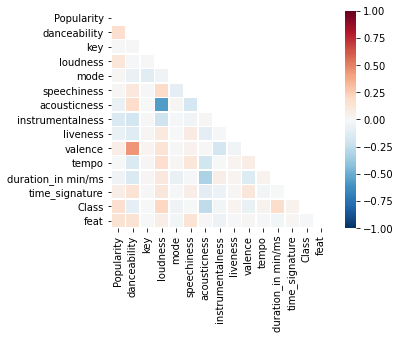

In [74]:
plot_corr(train)

# Splitting data into training, validation and testing sets

In [75]:
#train = train[train.columns.difference(['feat'])]
#test = test[test.columns.difference(['feat'])]

In [76]:
X_original = train.copy().drop(['Class'], axis=1)
Y_original = train['Class'].copy()

test_x = test.copy()

In [77]:
def run_model(model, X,Y):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=567)
    model = model.fit(x_train, y_train)
    rf_probs = model.predict_proba(x_test)
    rf_predictions = model.predict(x_test)
    loss = log_loss(y_test,rf_probs)
    
    print('Log loss:',loss,'\n')
    
    print("Example model output:")
    print(rf_probs[:3],'\n')
      
    print('Targets:')
    print(y_test[:3])
    
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, x_test, y_test, ax=ax) 
    
    return rf_probs, rf_predictions, loss

# Decision Tree Classifier

Log loss: 21.869882943459825 

Example model output:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 

Targets:
13046    9
17860    6
11558    2
Name: Class, dtype: int64


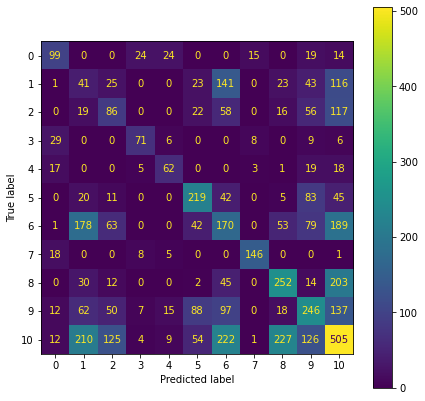

In [78]:
model_dt = DecisionTreeClassifier(max_features = 'sqrt', random_state=567)
dt_probs, dt_predictions, dt_loss = run_model(model_dt, X_original, Y_original)

# Random Forest Classifier

Log loss: 1.5352754088175464 

Example model output:
[[0.         0.02       0.         0.         0.01       0.02
  0.         0.         0.02       0.09       0.84      ]
 [0.04       0.12166667 0.16       0.         0.01       0.06
  0.25833333 0.         0.01       0.24       0.1       ]
 [0.         0.03833333 0.06       0.         0.         0.01
  0.055      0.         0.04       0.02       0.77666667]] 

Targets:
13046    9
17860    6
11558    2
Name: Class, dtype: int64


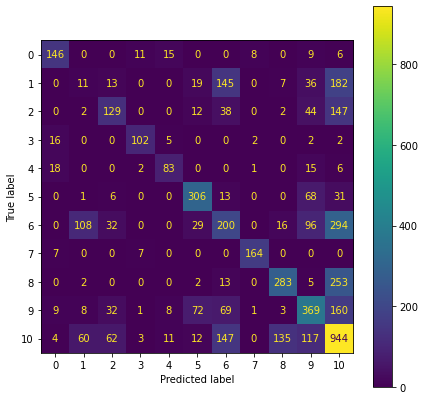

In [79]:
model_rf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt', random_state=567)
rf_probs, rf_predictions, rf_loss = run_model(model_rf, X_original, Y_original)

# AdaBoosting Classifier

Log loss: 2.783541038912559 

Example model output:
[[1.00255735e-05 1.86301118e-01 2.01308500e-01 1.00424147e-05
  1.02913178e-05 8.02962658e-02 1.02741574e-01 7.17514175e-06
  1.58087669e-01 1.03582436e-01 1.67644903e-01]
 [5.77736450e-04 1.68990099e-01 1.68620755e-01 5.79734264e-04
  4.20645081e-04 6.39280576e-05 1.70894562e-01 5.80095627e-04
  1.55984361e-01 1.65963680e-01 1.67324403e-01]
 [9.88801922e-06 1.87390692e-01 2.03123709e-01 9.86331602e-06
  1.01026011e-05 7.94805924e-02 1.02839291e-01 6.84703539e-06
  1.57966735e-01 1.01311634e-01 1.67850647e-01]] 

Targets:
13046    9
17860    6
11558    2
Name: Class, dtype: int64


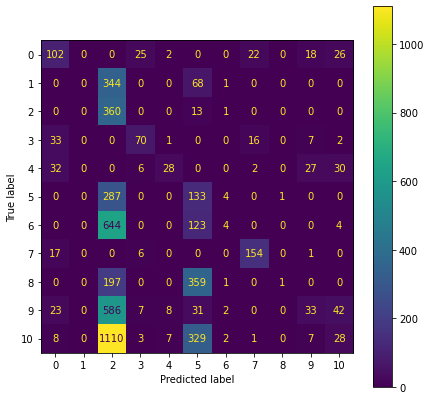

In [80]:
model_ada = AdaBoostClassifier(n_estimators=100, random_state=567)
ada_probs, ada_predictions, ada_loss = run_model(model_ada, X_original, Y_original)

# Gradient Boosting Classifier

Log loss: 1.232741627267761 

Example model output:
[[4.71681644e-04 9.01368488e-02 1.70865728e-02 1.33891972e-04
  1.94728724e-03 5.38378167e-02 1.21383686e-01 1.12535592e-04
  2.63956498e-02 2.85137089e-01 4.03356941e-01]
 [1.06622080e-03 1.73317252e-01 6.63640482e-02 4.44559825e-04
  8.88699435e-04 1.23150880e-02 3.67064608e-01 2.04470971e-04
  2.81330770e-03 2.83976730e-01 9.15450155e-02]
 [2.00517111e-04 9.87518469e-02 1.06444146e-01 2.36266869e-04
  3.27889527e-04 6.00409974e-03 1.04023413e-01 7.87478666e-05
  1.63298798e-01 2.10967806e-02 4.99537494e-01]] 

Targets:
13046    9
17860    6
11558    2
Name: Class, dtype: int64


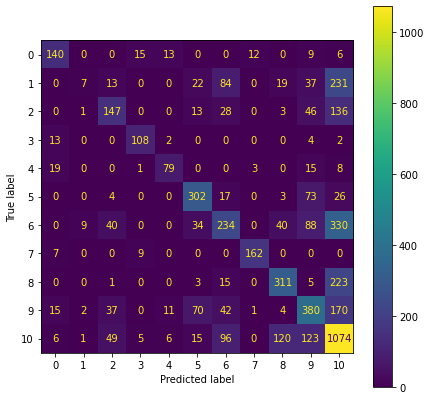

In [81]:
model_gb = GradientBoostingClassifier(n_estimators=100, max_features = 'sqrt', random_state=567)
gb_probs, gb_predictions, gb_loss = run_model(model_gb, X_original, Y_original)

# Light Gradient Boosting Classifier

Log loss: 1.2638724875599285 

Example model output:
[[4.45854247e-06 5.57098362e-02 7.05287145e-03 2.54099937e-06
  6.21577257e-06 8.51496134e-03 5.67111557e-02 3.56839405e-06
  1.20132716e-02 2.23229441e-01 6.36751679e-01]
 [1.24494493e-05 5.00721327e-02 9.42198289e-03 2.44362965e-06
  2.63874537e-06 1.50542053e-02 7.24670452e-01 3.43165513e-06
  7.56861533e-04 1.33298168e-01 6.67052338e-02]
 [3.96058813e-06 8.22281370e-02 7.10306891e-02 2.27149424e-06
  6.01506451e-06 1.54789203e-03 9.19490259e-02 3.18992073e-06
  4.71616572e-02 1.19438285e-02 6.94123333e-01]] 

Targets:
13046    9
17860    6
11558    2
Name: Class, dtype: int64


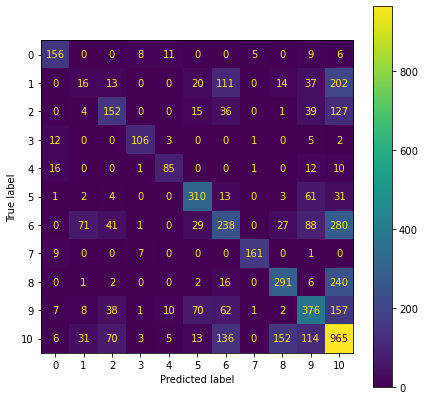

In [82]:
model_lgb = LGBMClassifier(n_estimators=100, random_state=567)
lgb_probs, lgb_predictions, lgb_loss = run_model(model_lgb, X_original, Y_original)

# Gaussian Naive Bayes

Log loss: 1.9044729242457674 

Example model output:
[[7.49945777e-07 5.71494128e-02 2.63574340e-03 1.96014348e-05
  7.36421137e-07 1.54238150e-01 5.84562070e-02 7.48922147e-15
  3.74867380e-03 2.64007268e-01 4.59743458e-01]
 [1.89854231e-02 7.09794208e-02 1.93693887e-01 2.74576464e-02
  6.43114713e-03 3.10408477e-03 2.31229541e-01 4.46326750e-08
  1.79399126e-04 2.94725703e-01 1.53213703e-01]
 [2.30497699e-15 5.69676188e-02 3.58765592e-02 2.30771554e-09
  2.90870992e-19 8.30285093e-04 6.93936025e-02 1.53654893e-20
  2.75297339e-01 5.44292005e-03 5.56191673e-01]] 

Targets:
13046    9
17860    6
11558    2
Name: Class, dtype: int64


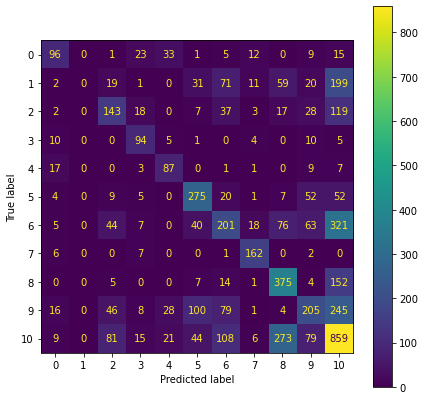

In [83]:
model_gnb = GaussianNB()
gnb_probs, gnb_predictions, gnb_loss = run_model(model_gnb, X_original, Y_original)

# K-nearest Neighbors (KNN) Classifier

Log loss: 8.828252596975458 

Example model output:
[[0.  0.2 0.  0.  0.  0.2 0.  0.  0.  0.  0.6]
 [0.  0.2 0.  0.  0.  0.  0.2 0.  0.  0.6 0. ]
 [0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.2 0.6]] 

Targets:
13046    9
17860    6
11558    2
Name: Class, dtype: int64


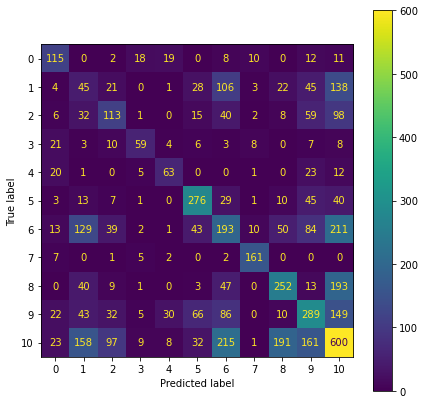

In [84]:
modelknn = KNeighborsClassifier(n_neighbors=5)
knn_probs, knn_predictions, knn_loss = run_model(modelknn, X_original, Y_original)

# Support Vector Machine (SVM) Classifier

Log loss: 1.2986447630440277 

Example model output:
[[3.97207843e-04 1.02605588e-01 3.26192063e-02 4.31825090e-04
  7.23669493e-04 1.18396912e-01 1.28818126e-01 2.48156607e-04
  1.38337650e-02 2.20121749e-01 3.81803795e-01]
 [4.37174469e-02 6.20211286e-02 5.90883932e-02 1.90217684e-02
  9.75612826e-03 1.17174443e-02 1.54739637e-01 2.71570027e-03
  2.67802257e-03 5.51048717e-01 8.34956141e-02]
 [1.80410317e-04 1.05526247e-01 1.03914734e-01 1.86336895e-04
  1.61745627e-04 8.79408840e-03 1.43138797e-01 1.41650289e-04
  1.01297507e-01 1.46522760e-02 5.22006207e-01]] 

Targets:
13046    9
17860    6
11558    2
Name: Class, dtype: int64


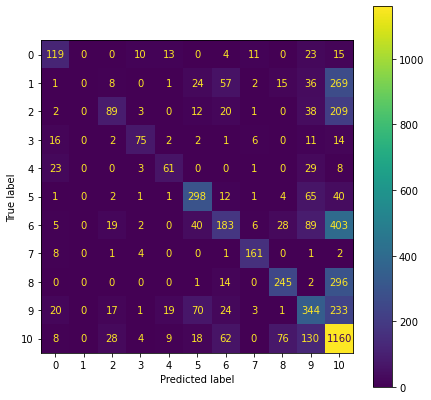

In [85]:
modelsvm = svm.SVC(decision_function_shape='ovr', probability=True)
svm_probs, svm_predictions, svm_loss = run_model(modelsvm, X_original, Y_original)

# Resampling
Since there is imbalanced class distribution, resampling is carried out to investigate whether change of class distribution can impact the final model results.

In [86]:
train['Class'].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

### Undersampling

#### Random undersampling

In [87]:
#Random undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled_rus, Y_resampled_rus = rus.fit_resample(X_original, Y_original)

#Undersampling through clusters
cc = ClusterCentroids(random_state=0)
X_resampled_cc, Y_resampled_cc = cc.fit_resample(X_original, Y_original)

In [88]:
X_resampled_rus.shape, Y_resampled_rus.shape, X_resampled_cc.shape, Y_resampled_cc.shape

((4257, 14), (4257,), (4257, 14), (4257,))

Log loss: 1.0299880089003512 

Example model output:
[[3.33539868e-03 4.29430342e-01 3.74456734e-02 9.57915441e-04
  6.55235915e-03 2.00742586e-02 1.95506126e-01 8.05312612e-04
  1.68793827e-01 2.50827425e-02 1.12016045e-01]
 [3.88441048e-03 8.03676561e-04 4.37213914e-05 1.07133733e-03
  1.48982090e-04 7.86364612e-05 4.79610589e-04 9.92671112e-01
  4.96725805e-04 2.09398821e-04 1.12388621e-04]
 [1.70793748e-03 2.77869055e-01 3.49891495e-02 4.29010340e-04
  1.76591690e-03 1.63240048e-02 4.58001031e-02 9.97408868e-04
  5.74712728e-01 1.28398870e-02 3.25647992e-02]] 

Targets:
3432    8
2738    7
3336    8
Name: Class, dtype: int64


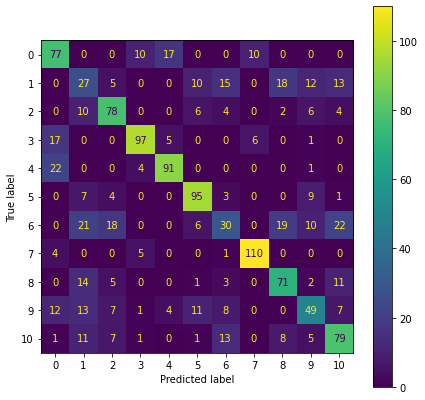

In [89]:
model_gb2 = GradientBoostingClassifier(n_estimators=100, max_features = 'sqrt', random_state=567)
gb2_probs, gb2_predictions, gb2_loss = run_model(model_gb2, X_resampled_cc, Y_resampled_cc)

Log loss: 1.0849351919521386 

Example model output:
[[5.10157905e-04 1.07963838e-01 9.15364282e-03 2.92126941e-04
  9.71786971e-04 6.06228272e-03 1.09976322e-01 4.32458744e-04
  6.09573587e-01 1.16744840e-02 1.43389313e-01]
 [2.90083603e-02 3.17640373e-03 1.51586651e-03 8.19514663e-03
  5.23950019e-03 7.85823125e-04 1.84735270e-03 9.44347704e-01
  9.67150455e-04 3.20248540e-03 1.71420722e-03]
 [1.03232051e-03 2.91002735e-01 2.59888958e-02 4.50632624e-04
  3.32358474e-03 1.25563260e-02 3.96906576e-01 2.05794800e-04
  2.01085499e-02 3.88599388e-02 2.09564646e-01]] 

Targets:
3432    8
2738    7
3336    8
Name: Class, dtype: int64


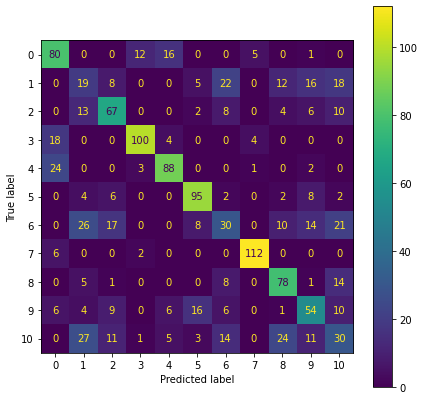

In [90]:
model_gb3 = GradientBoostingClassifier(n_estimators=100, max_features = 'sqrt', random_state=567)
gb3_probs, gb3_predictions, gb3_loss = run_model(model_gb3, X_resampled_rus, Y_resampled_rus)

### Oversampling

In [91]:
#Random oversampling
ros = RandomOverSampler(random_state=0)
X_resampled_ros, Y_resampled_ros = ros.fit_resample(X_original, Y_original)

#Synthetic Minority Oversampling Technique (SMOTE)
X_resampled_smote, Y_resampled_smote = SMOTE().fit_resample(X_original, Y_original)

In [92]:
X_resampled_ros.shape, Y_resampled_ros.shape, X_resampled_smote.shape, Y_resampled_smote.shape

((54439, 14), (54439,), (54439, 14), (54439,))

Log loss: 0.909170470889275 

Example model output:
[[2.93357796e-01 1.39155710e-02 1.26473173e-02 4.03071752e-01
  3.50471372e-03 5.50017038e-03 9.02994144e-03 1.98635080e-01
  7.88061516e-03 3.23237833e-02 2.01332604e-02]
 [9.31020301e-04 9.13635561e-02 2.51711034e-02 3.94415928e-04
  4.24752592e-04 2.40185599e-03 5.35707128e-02 2.45766896e-04
  6.89530108e-01 9.21295996e-03 1.26753748e-01]
 [1.07747867e-02 2.06240326e-03 2.84532739e-03 4.28343174e-03
  9.18623601e-01 6.20650384e-04 2.31998934e-03 4.51097075e-04
  7.41984781e-04 5.21856787e-02 5.09104968e-03]] 

Targets:
29775    3
376      8
2063     4
Name: Class, dtype: int64


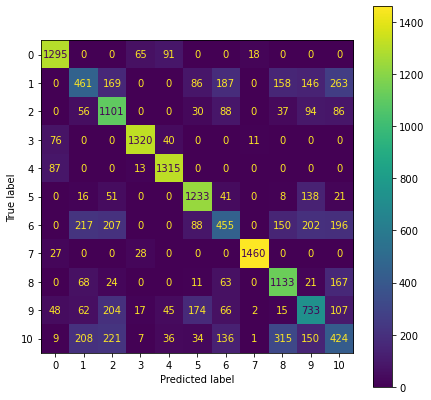

In [93]:
model_gb4 = GradientBoostingClassifier(n_estimators=100, max_features = 'sqrt', random_state=567)
gb4_probs, gb4_predictions, gb4_loss = run_model(model_gb4, X_resampled_ros, Y_resampled_ros)

Log loss: 0.8955239721837497 

Example model output:
[[1.15422467e-01 1.65763872e-03 3.76030466e-03 8.41857575e-01
  1.63913057e-02 5.48863934e-04 1.46897191e-03 3.55881567e-03
  6.17821910e-04 1.16380560e-02 3.07818008e-03]
 [5.46796615e-04 6.53860634e-02 2.44056283e-02 5.13908950e-04
  5.96717183e-04 3.03509575e-03 5.04640187e-02 1.19120782e-04
  7.43268091e-01 6.59027268e-03 1.05074286e-01]
 [1.18548041e-02 1.87762943e-03 1.22461456e-03 2.16722921e-03
  9.51418175e-01 3.79975884e-04 1.28949389e-03 1.78877627e-04
  5.67361134e-04 2.57077401e-02 3.33409898e-03]] 

Targets:
29775    3
376      8
2063     4
Name: Class, dtype: int64


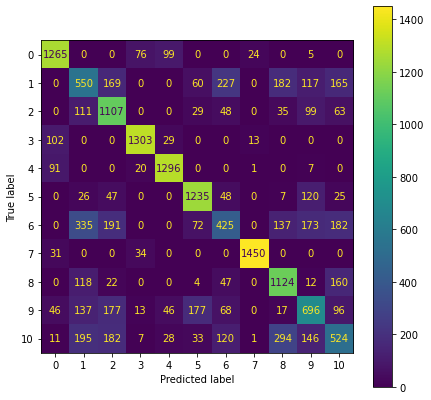

In [94]:
model_gb5 = GradientBoostingClassifier(n_estimators=100, max_features = 'sqrt', random_state=567)
gb5_probs, gb5_predictions, gb5_loss = run_model(model_gb5, X_resampled_smote, Y_resampled_smote)

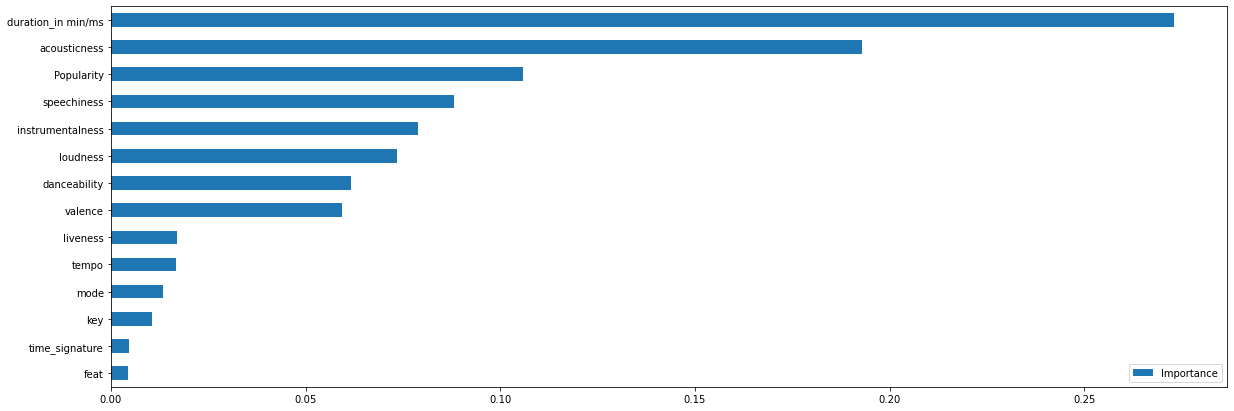

In [95]:
importance = model_gb5.feature_importances_
importance = pd.DataFrame(importance, index=X_resampled_smote.columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2))

Since only certain variables are important for modelling, more experiments can be carried out to train the model with lesser variables.

In [96]:
pca = PCA(n_components=8)
fit_pca = pca.fit(X_resampled_smote)
X_resampled_smote_pca = fit_pca.transform(X_resampled_smote)

In [97]:
test_x_pca = fit_pca.transform(test_x)

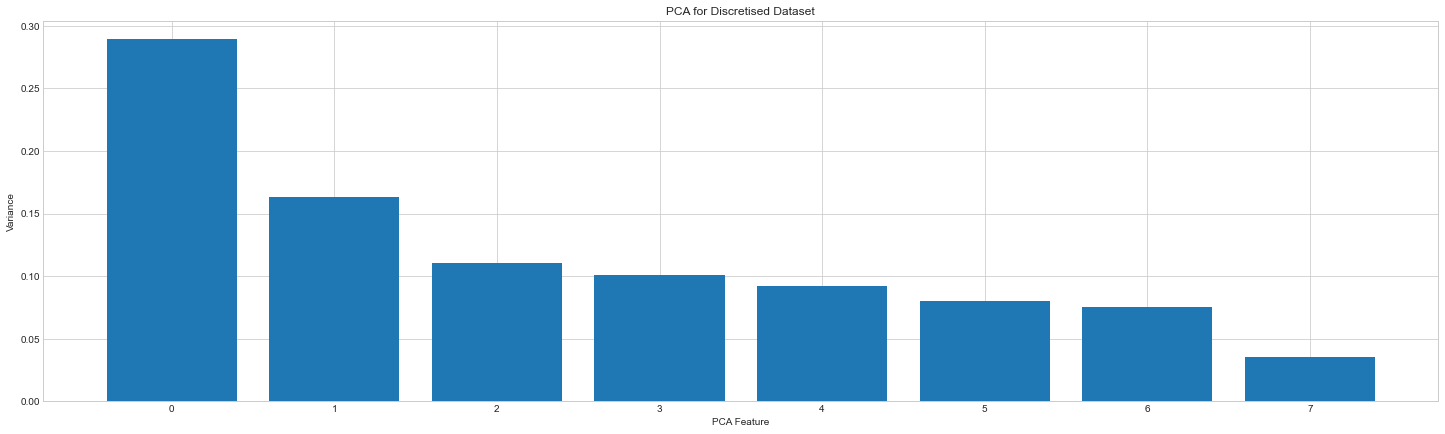

In [98]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit_pca.explained_variance_ratio_.size), fit_pca.explained_variance_ratio_);

In [99]:
#X_resampled_smote_pca[:,:5].shape

Log loss: 1.082690587019256 

Example model output:
[[1.18978869e-01 1.19844947e-03 5.10143535e-03 8.35268945e-01
  1.22525310e-02 3.15475384e-04 2.83920678e-03 2.99602081e-04
  4.34098447e-04 2.03691372e-02 2.94225045e-03]
 [1.72368912e-04 9.32539733e-02 1.01382438e-02 1.56114328e-04
  1.31546013e-04 4.99947586e-03 1.32386051e-01 2.26295827e-05
  5.53556353e-01 1.80919230e-02 1.87091321e-01]
 [8.43687211e-03 1.09140945e-02 7.59883252e-03 7.43746495e-03
  7.94351329e-01 1.11007139e-03 1.87385547e-02 5.85899130e-04
  2.22275854e-03 1.23549975e-01 2.50541488e-02]] 

Targets:
29775    3
376      8
2063     4
Name: Class, dtype: int64


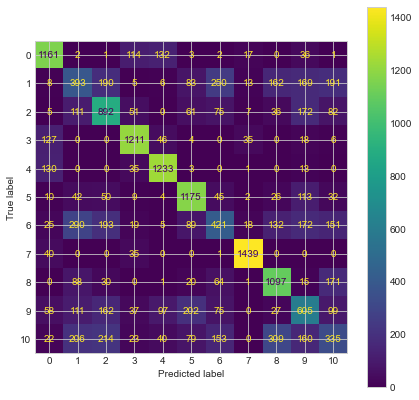

In [100]:
model_gb6 = GradientBoostingClassifier(n_estimators=200, max_features = 'sqrt', random_state=567)
pca_gb6_probs, pca_gb6_predictions, pca_gb6_loss = run_model(model_gb6, X_resampled_smote_pca, Y_resampled_smote)

# Generate submission file

In [101]:
names = ['Acoustic/Folk_0','Alt_Music_1','Blues_2','Bollywood_3',
         'Country_4','HipHop_5','Indie Alt_6','Instrumental_7',
         'Metal_8','Pop_9','Rock_10']

In [102]:
test_pred = model_gb5.predict(test_x)
test_pred_probs = pd.DataFrame(model_gb5.predict_proba(test_x), columns = names)

In [103]:
test_pred_probs.to_csv('my_submission_file6.csv', index=False)